# importing libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("weatherAUS.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete feature Count 2
Continuous feature Count 14
Categorical feature Count 7


# Handling  Missing Values

In [6]:
# Handle Missing Values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [7]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [8]:
def randomsampleimputation(df, variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [9]:
randomsampleimputation(df, "Cloud9am")
randomsampleimputation(df, "Cloud3pm")
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# data visialization using  Seaborn Library

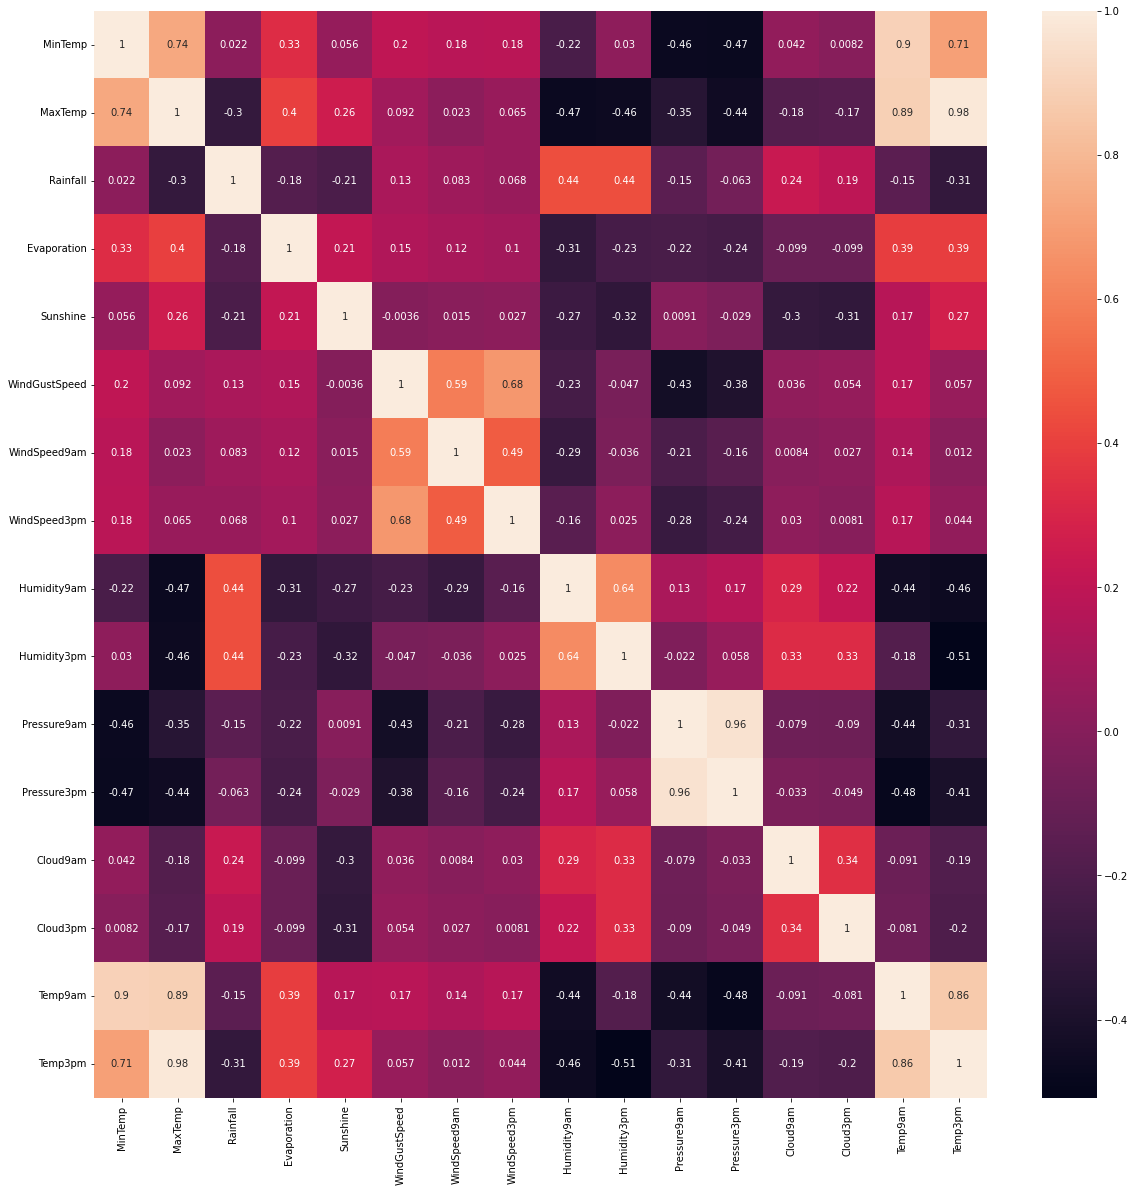

In [11]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

# A for loop is used to plot a Distplot for all the continuous features to see the outliers

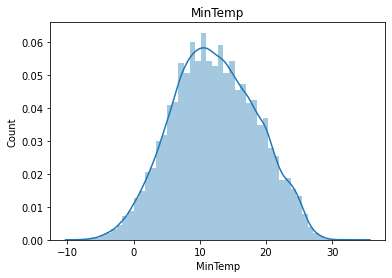

<Figure size 1080x1080 with 0 Axes>

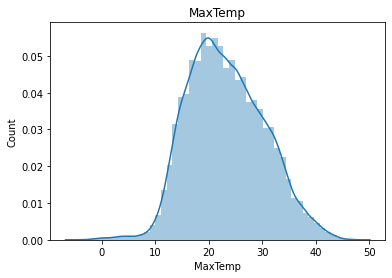

<Figure size 1080x1080 with 0 Axes>

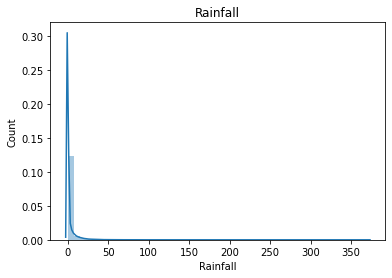

<Figure size 1080x1080 with 0 Axes>

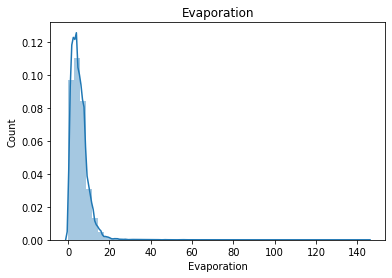

<Figure size 1080x1080 with 0 Axes>

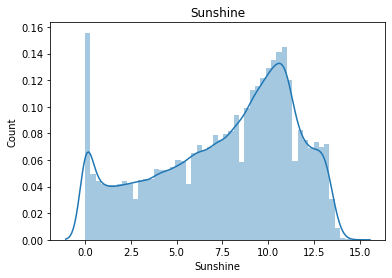

<Figure size 1080x1080 with 0 Axes>

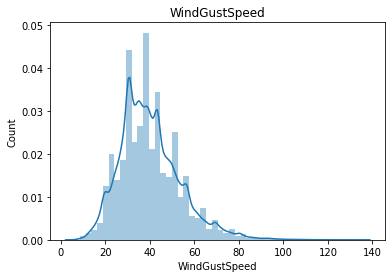

<Figure size 1080x1080 with 0 Axes>

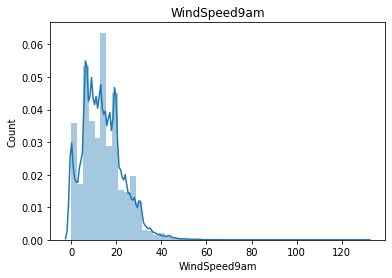

<Figure size 1080x1080 with 0 Axes>

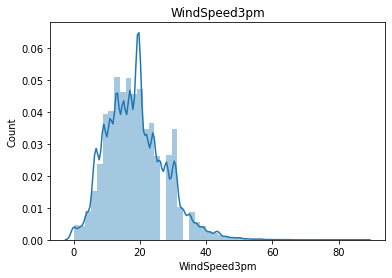

<Figure size 1080x1080 with 0 Axes>

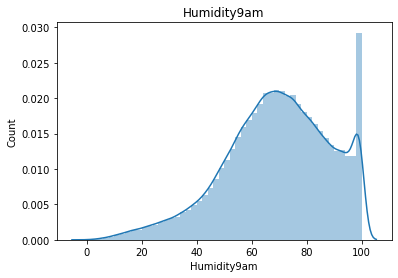

<Figure size 1080x1080 with 0 Axes>

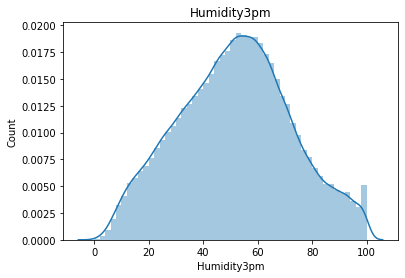

<Figure size 1080x1080 with 0 Axes>

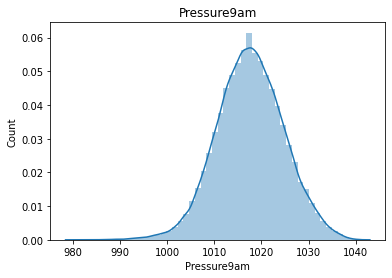

<Figure size 1080x1080 with 0 Axes>

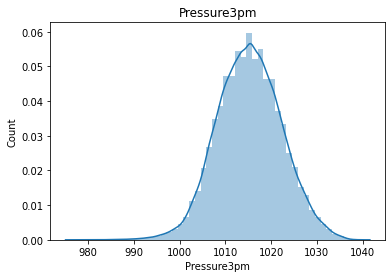

<Figure size 1080x1080 with 0 Axes>

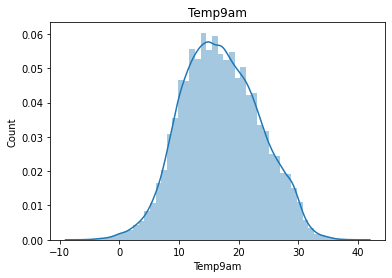

<Figure size 1080x1080 with 0 Axes>

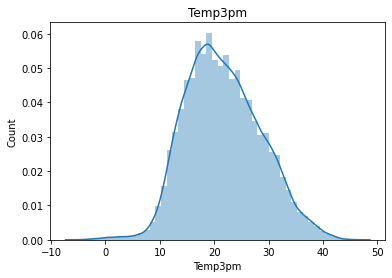

<Figure size 1080x1080 with 0 Axes>

In [12]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# A for loop is used to plot a boxplot for all the continuous features to see the outliers¶

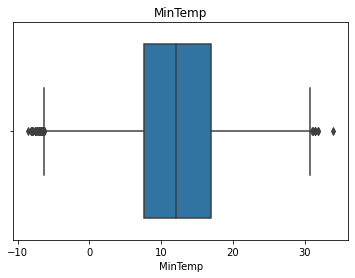

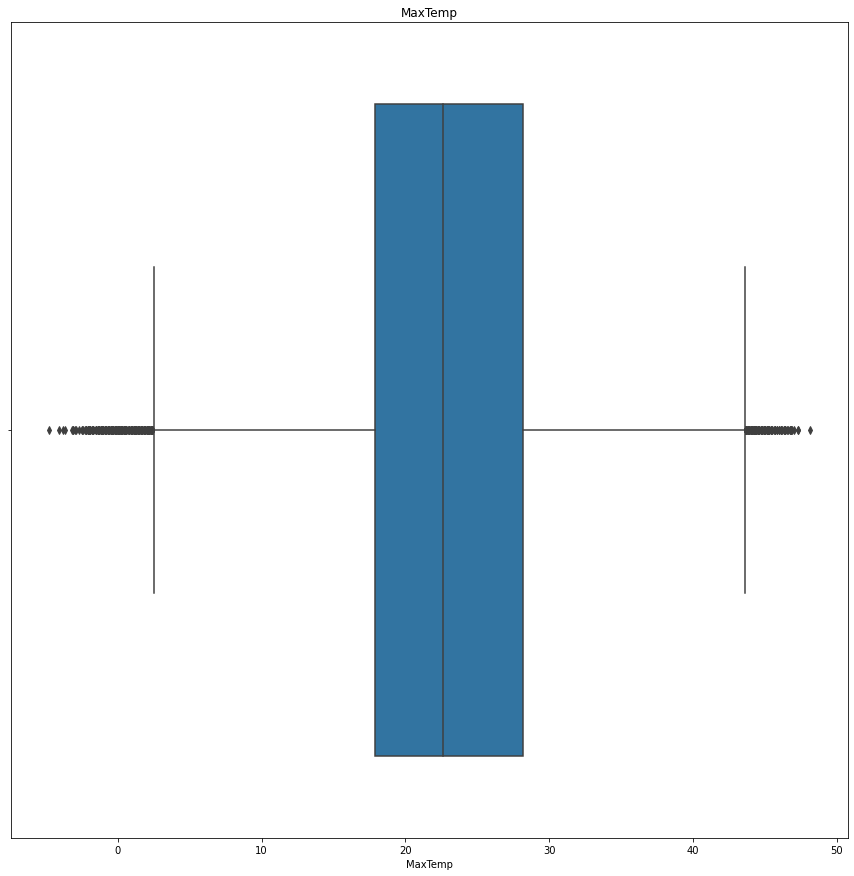

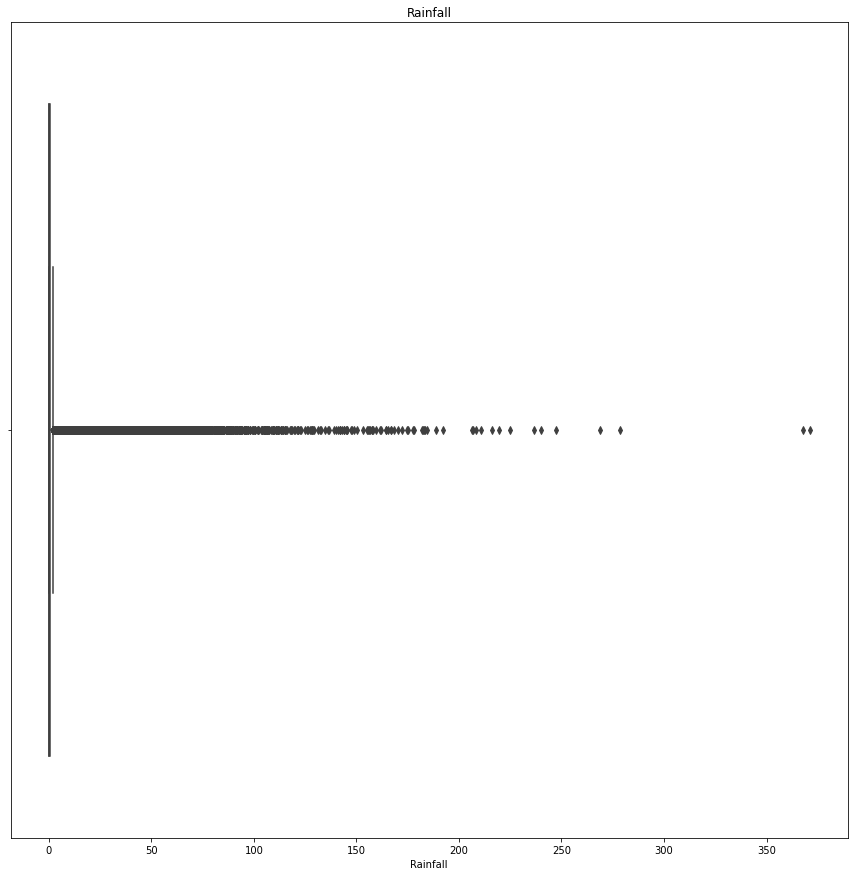

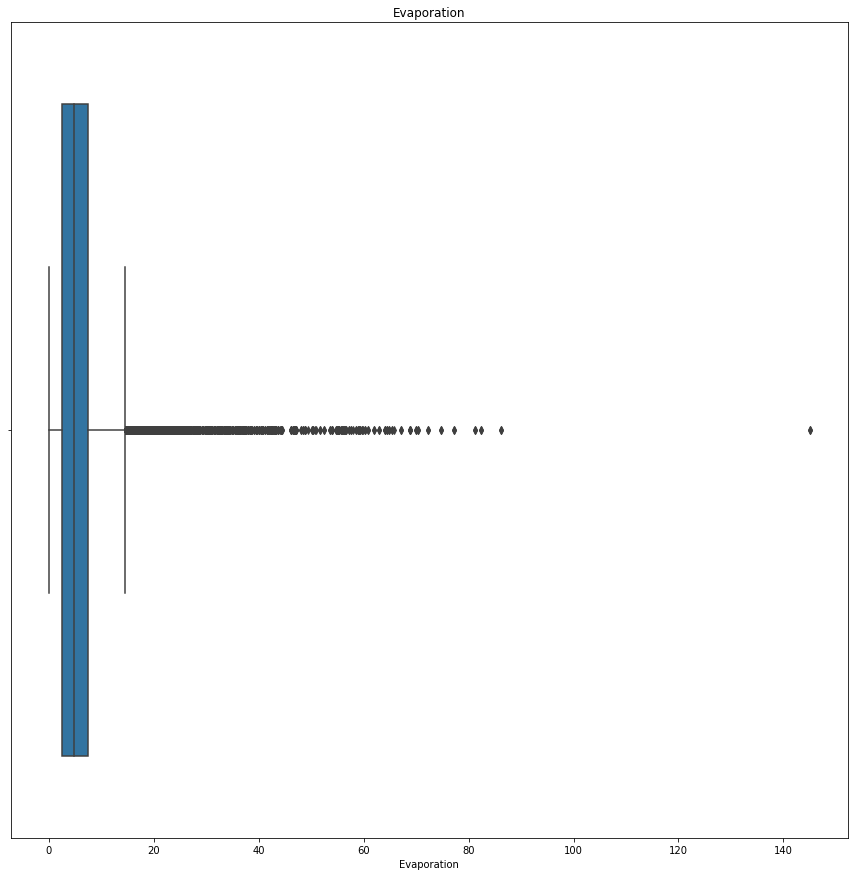

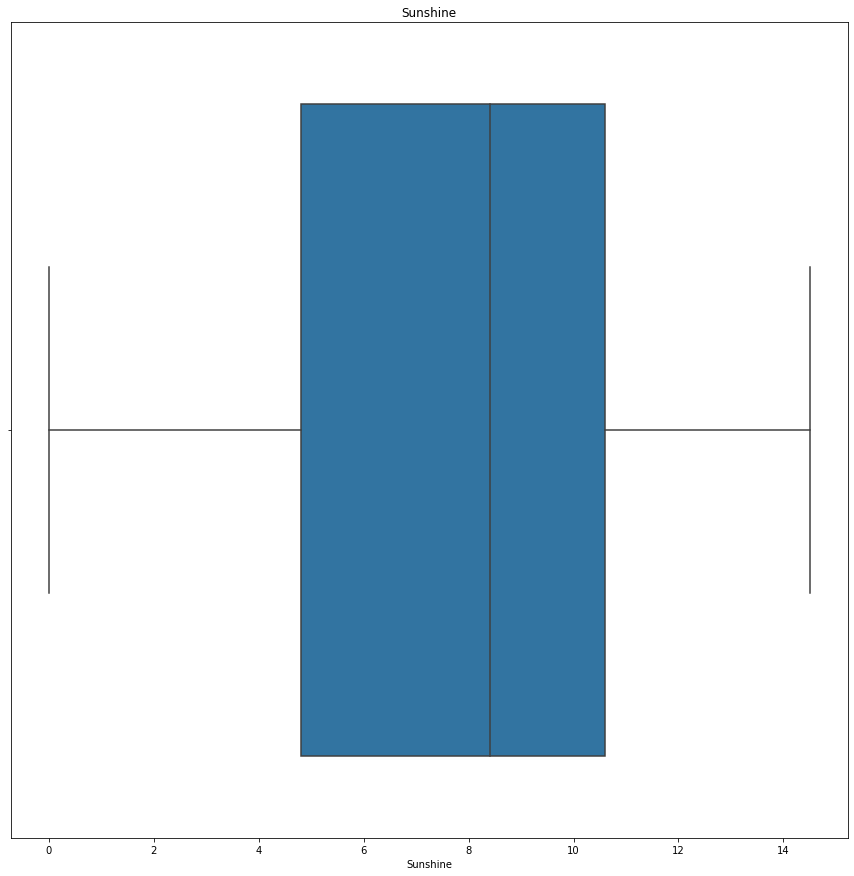

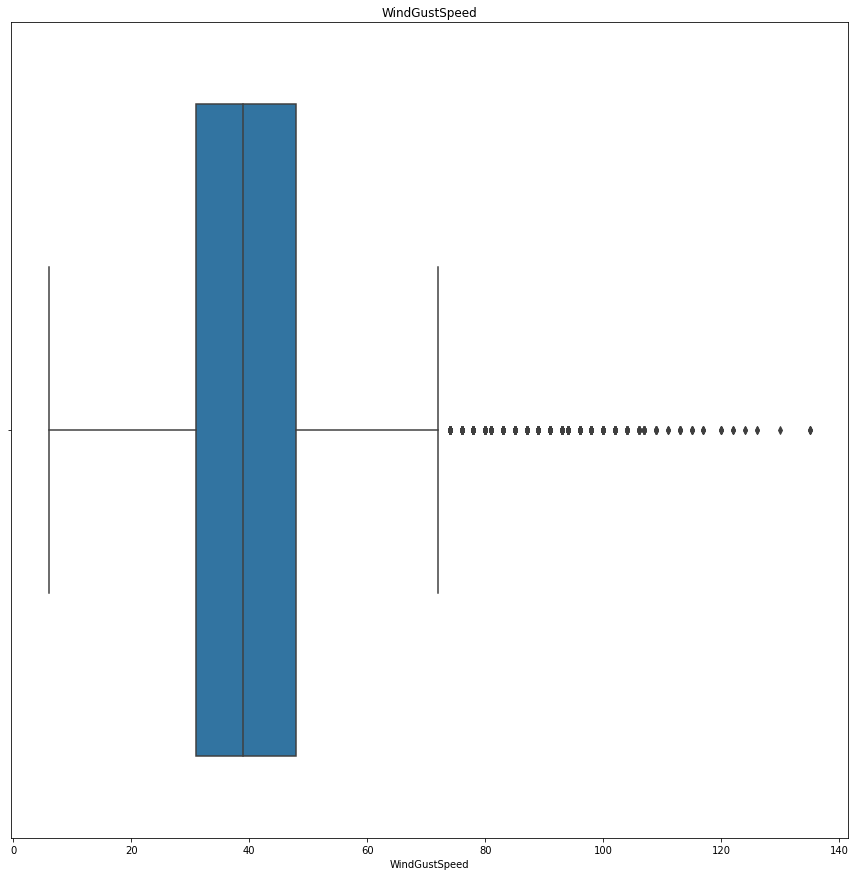

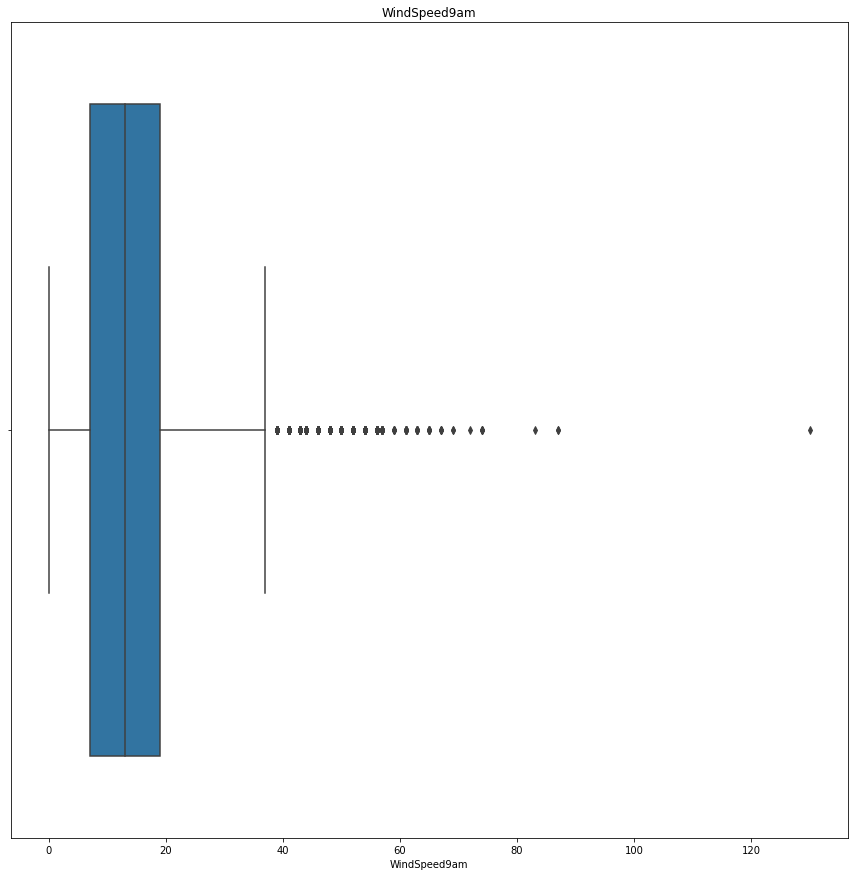

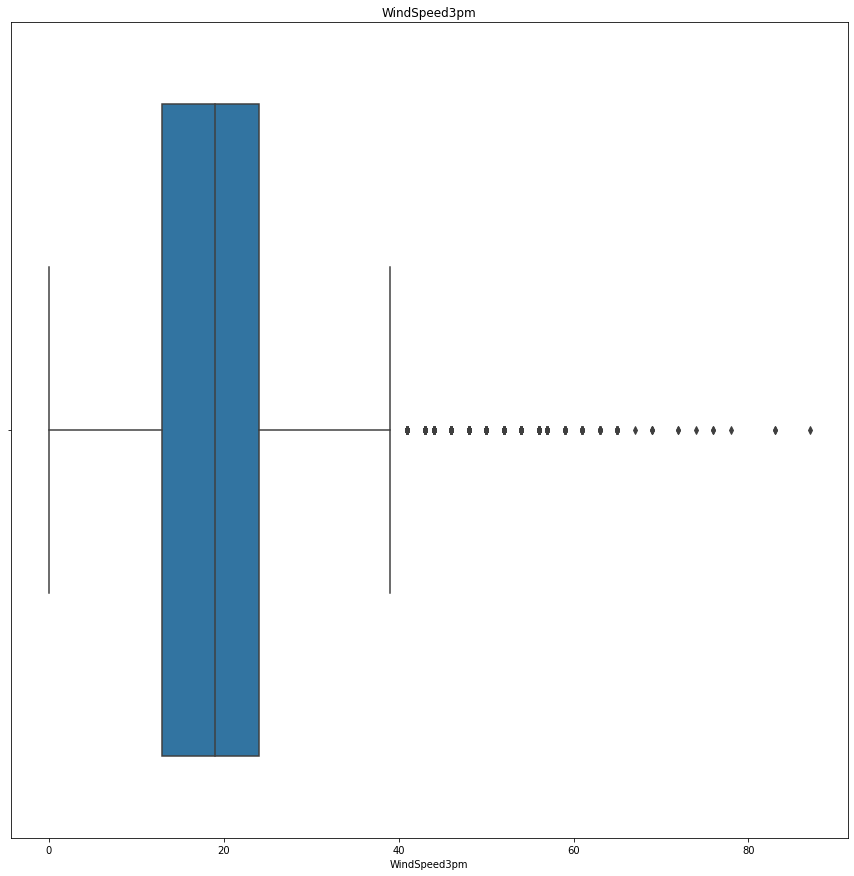

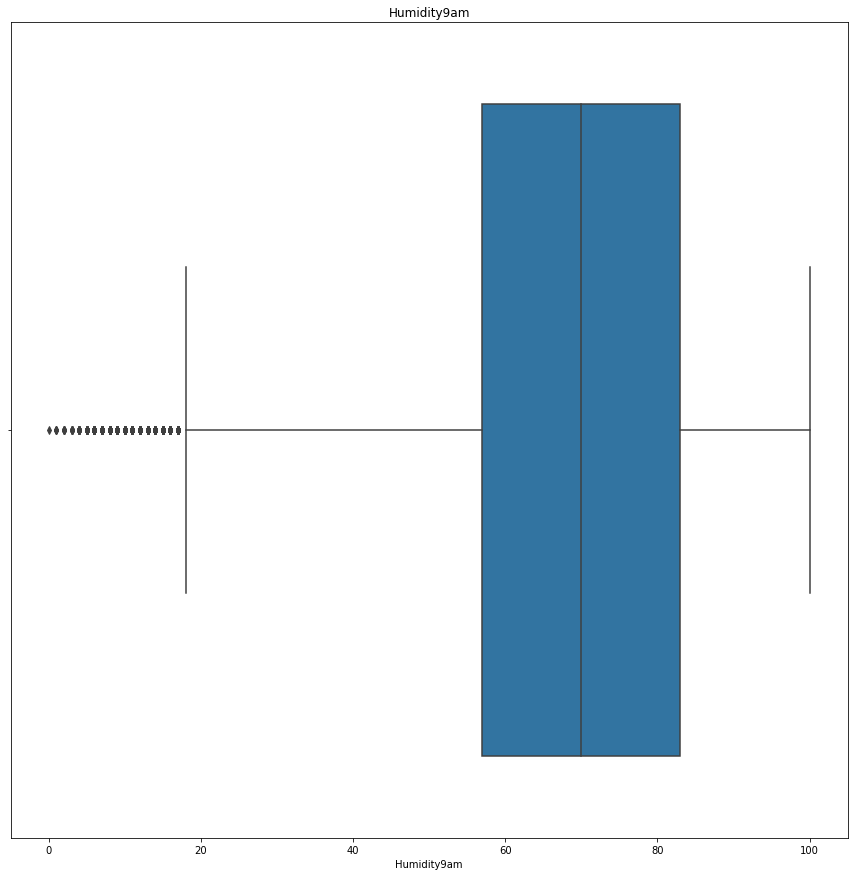

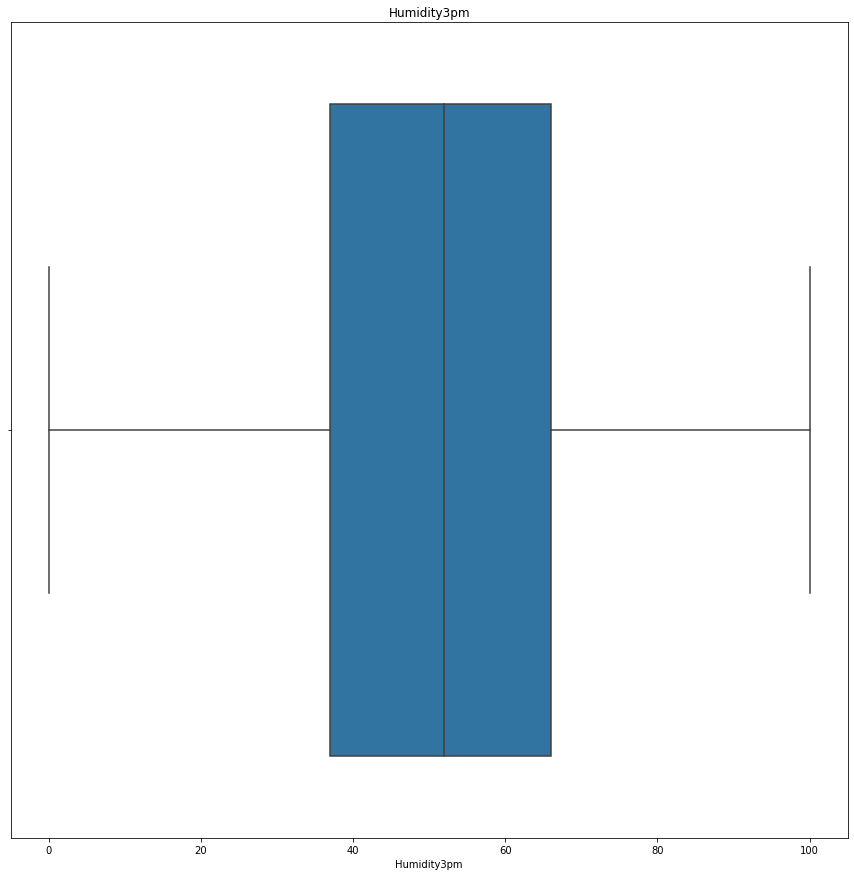

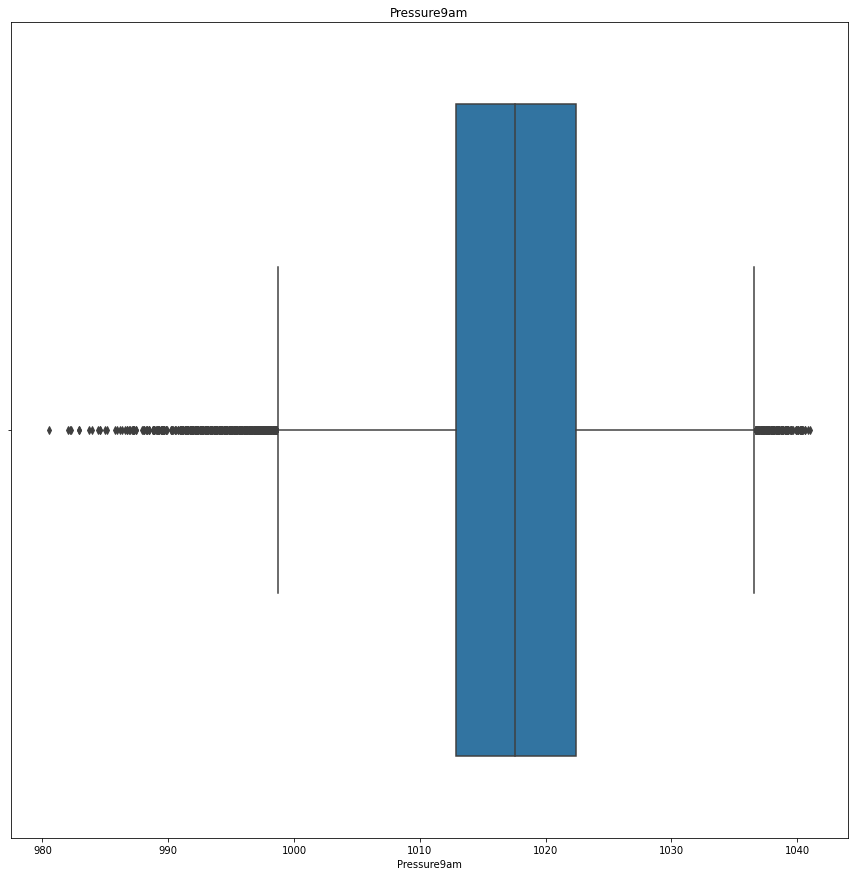

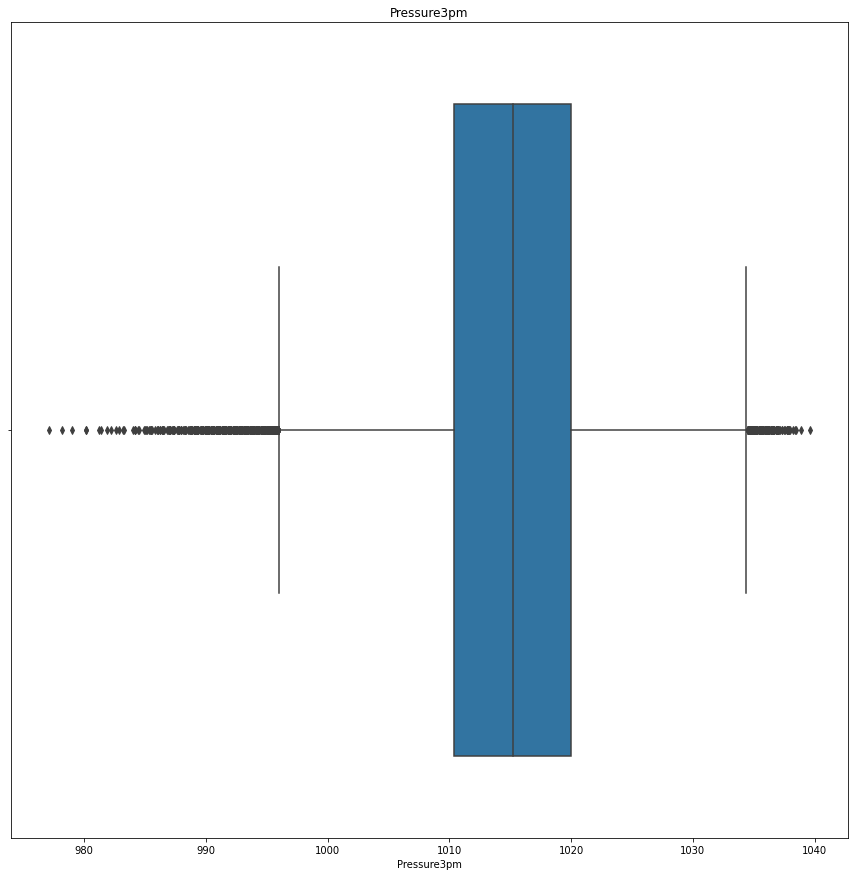

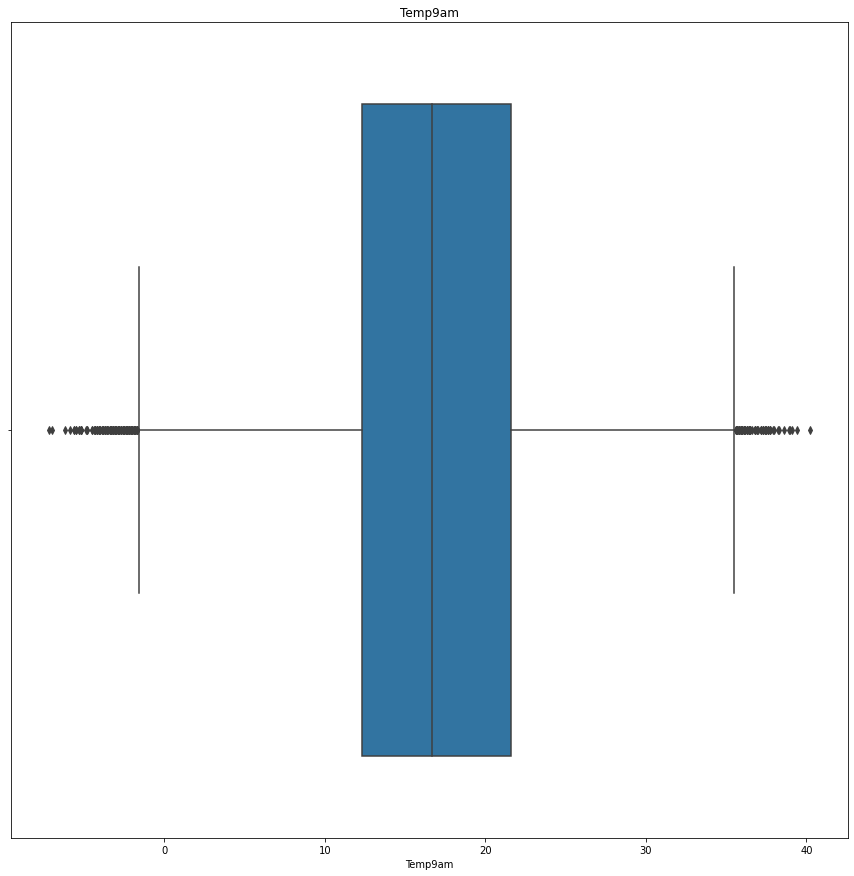

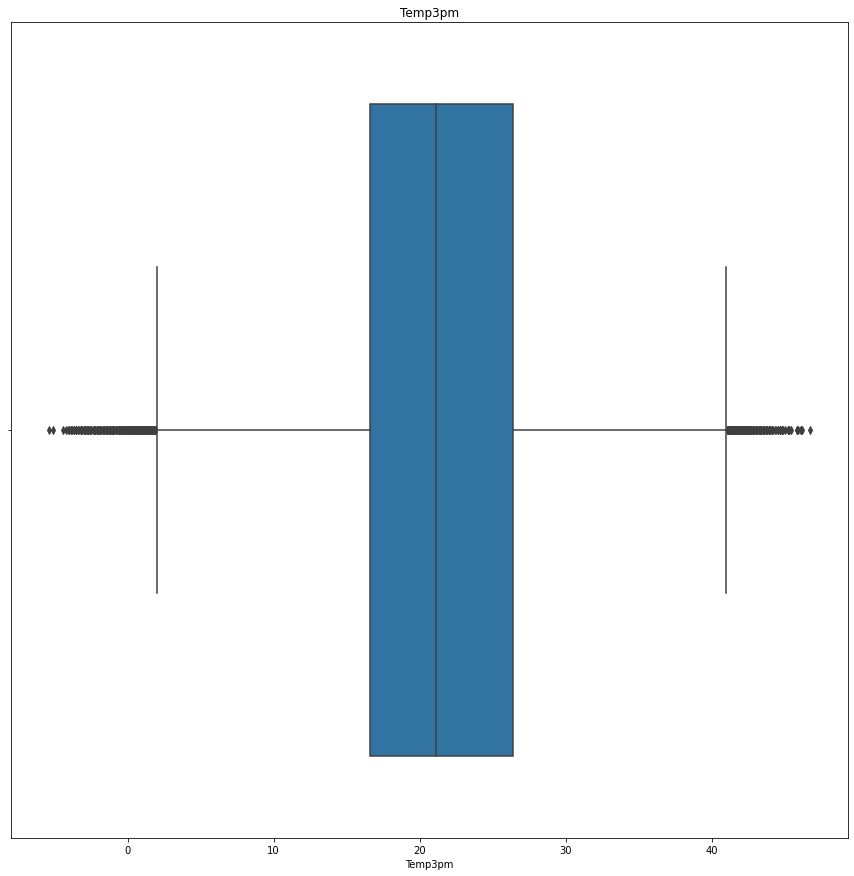

<Figure size 1080x1080 with 0 Axes>

In [13]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [14]:
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [15]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

In [16]:
discrete_feature

['Cloud9am', 'Cloud3pm']

In [17]:
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

# Set OneHotEncoding for RainToday and RainTomorrow from pandas Dummies

In [18]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,1.4,7.8,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,7.6,13.5,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,6.8,11.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,2.6,13.2,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


# Featuring the categorical data

In [19]:
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2008-01-19', '2007-12-07', '2007-12-15', '2007-12-16',
       '2007-12-19', '2007-12-20', '2007-12-21', '2007-12-22', '2007-12-24',
       ...
       '2008-05-02', '2008-05-01', '2008-04-30', '2008-04-29', '2008-04-28',
       '2008-04-26', '2008-04-25', '2016-11-26', '2012-04-07', '2008-08-17'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [20]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [21]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [22]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [23]:
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [24]:
df1

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [25]:
df1[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [26]:
df1[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [27]:
len(df1[1].sort_values(ascending = False).index)

49

In [28]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [29]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")

In [30]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [31]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


# data visialization using Seaborn Library

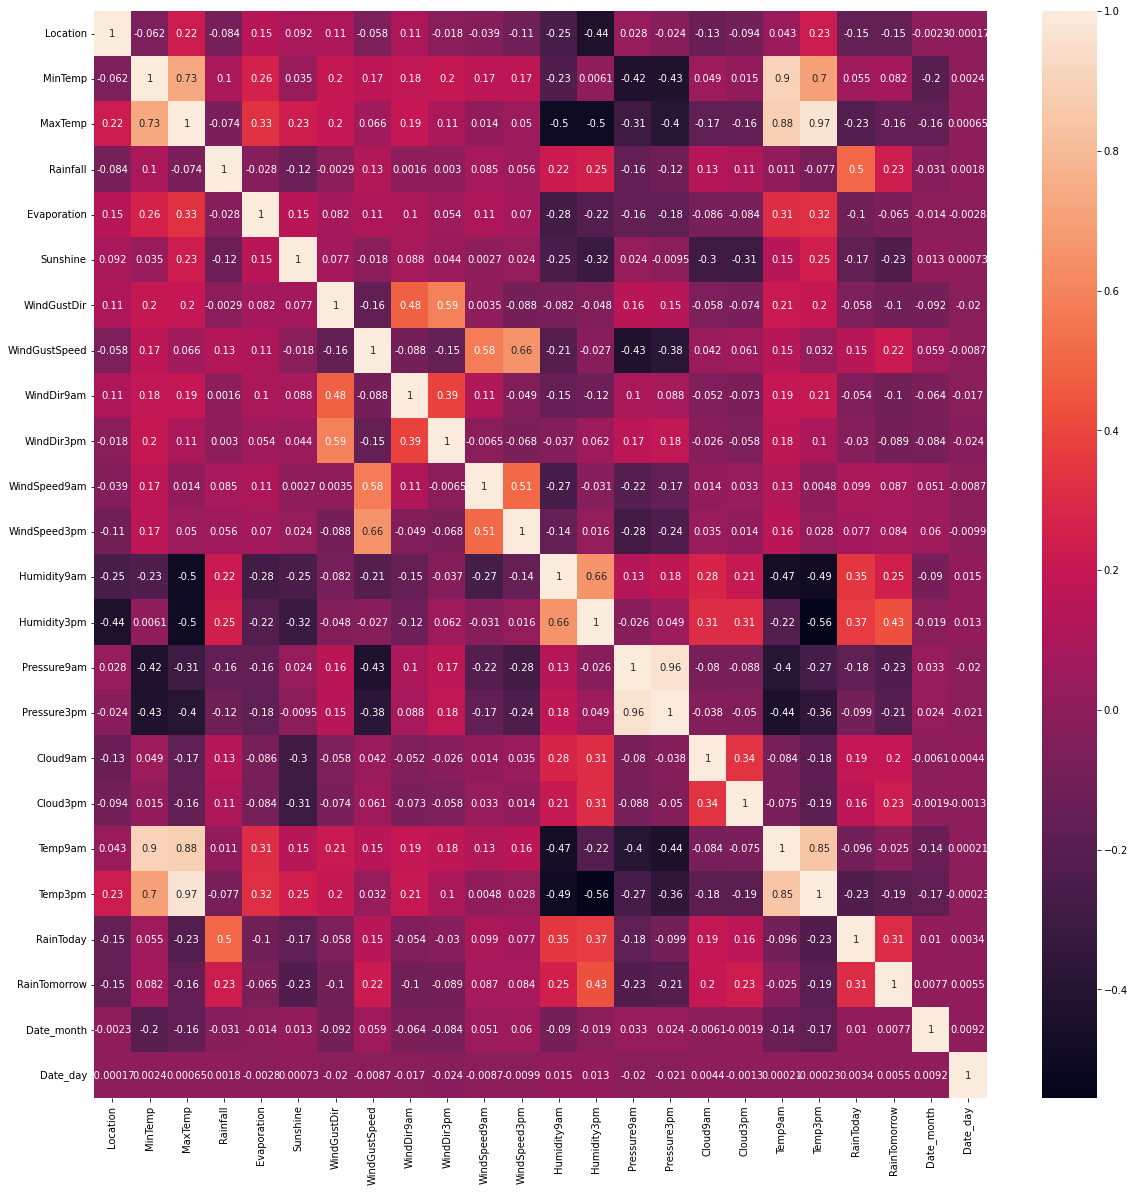

In [32]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

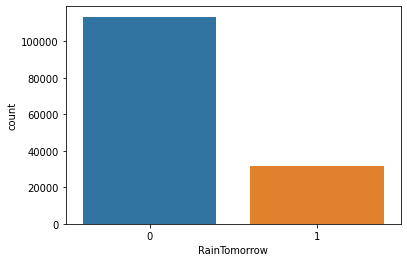

In [33]:
sns.countplot(df["RainTomorrow"])

In [34]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0,6,21
145456,2017-06-22,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0,6,22
145457,2017-06-23,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0,6,23
145458,2017-06-24,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,6,24


# Continuous Features Plotting using Box

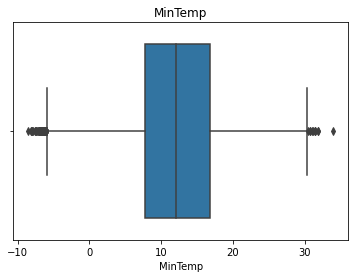

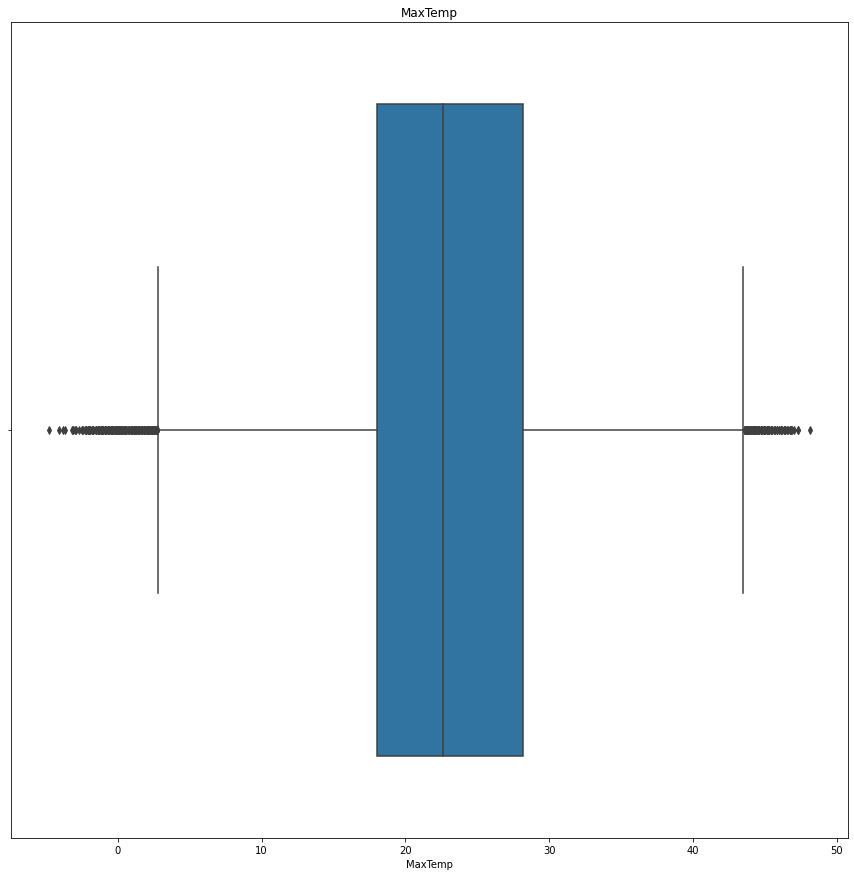

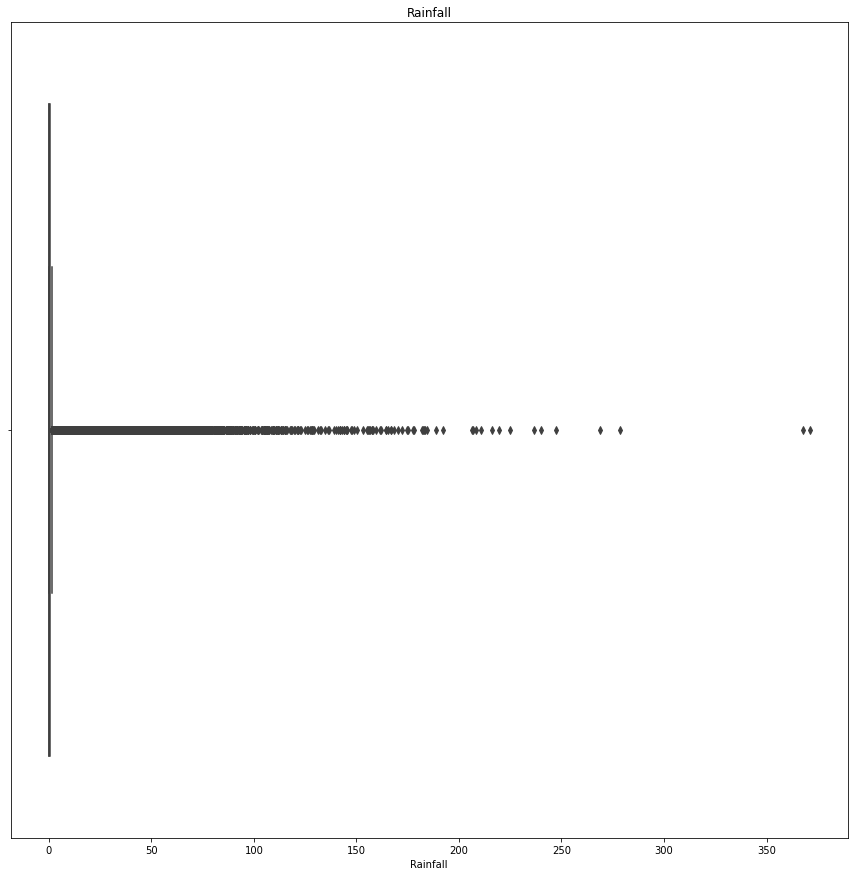

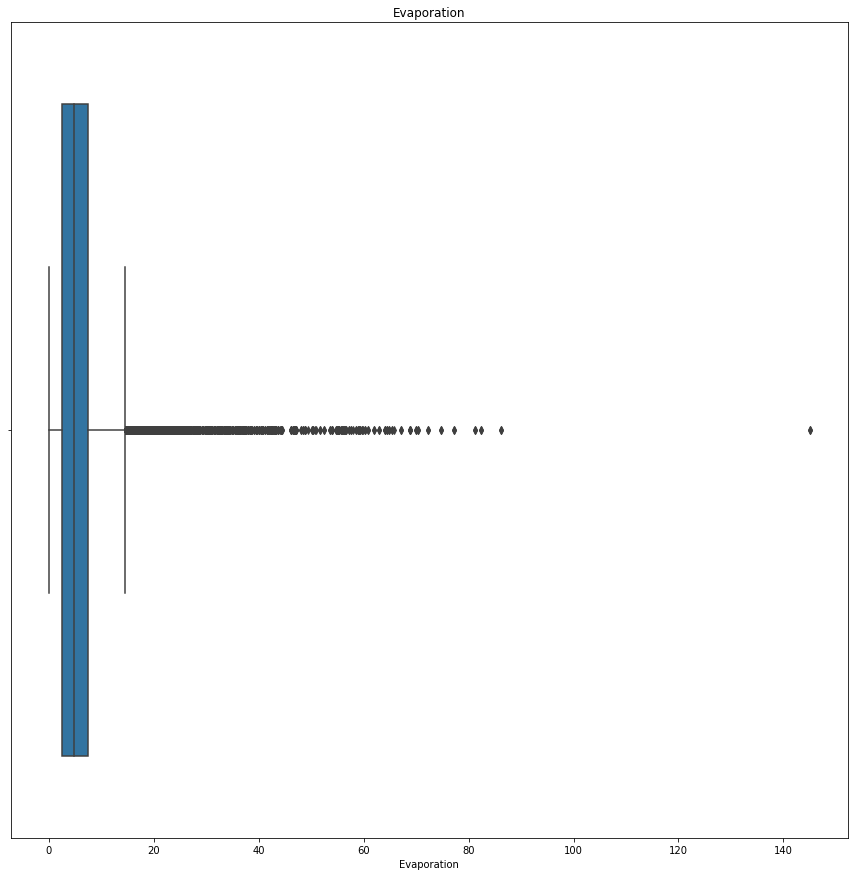

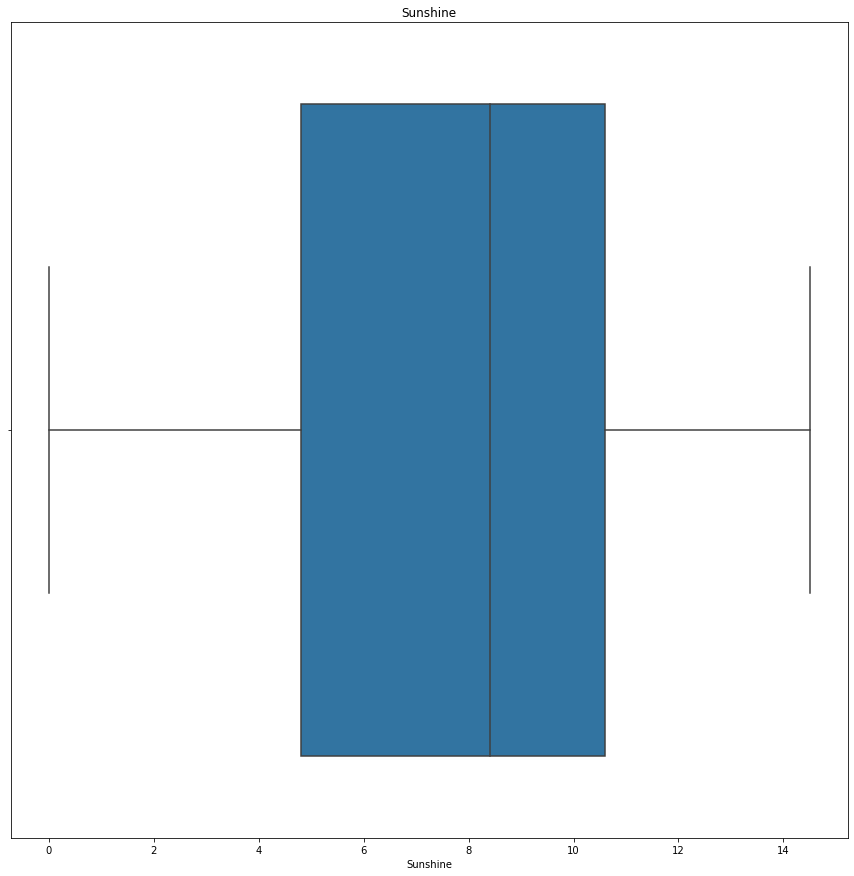

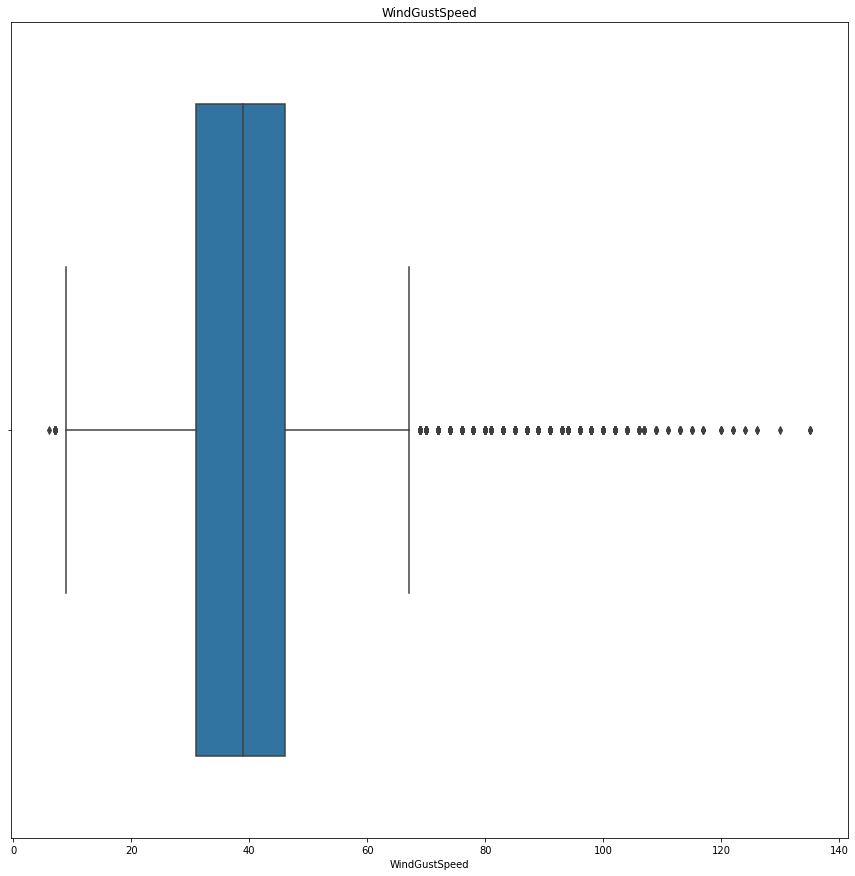

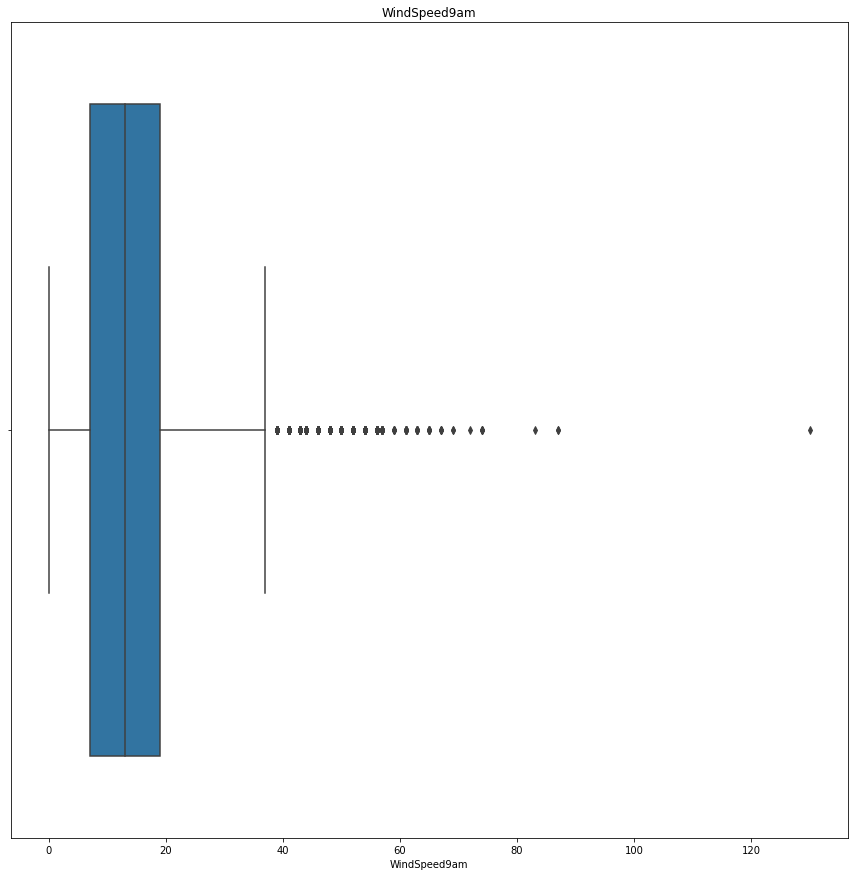

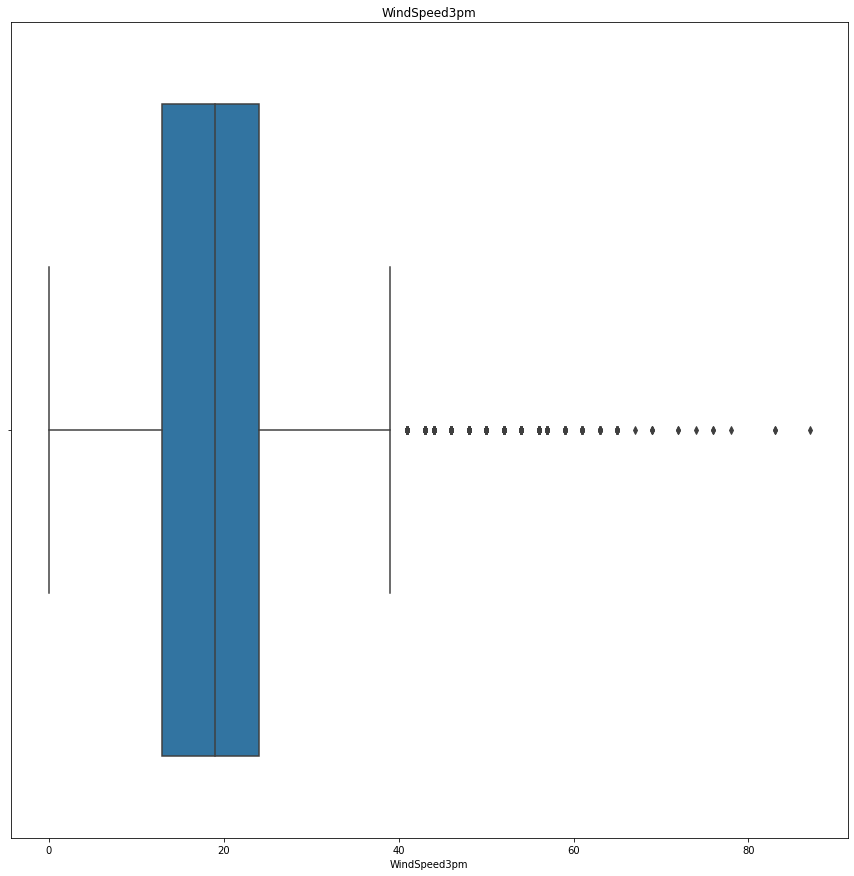

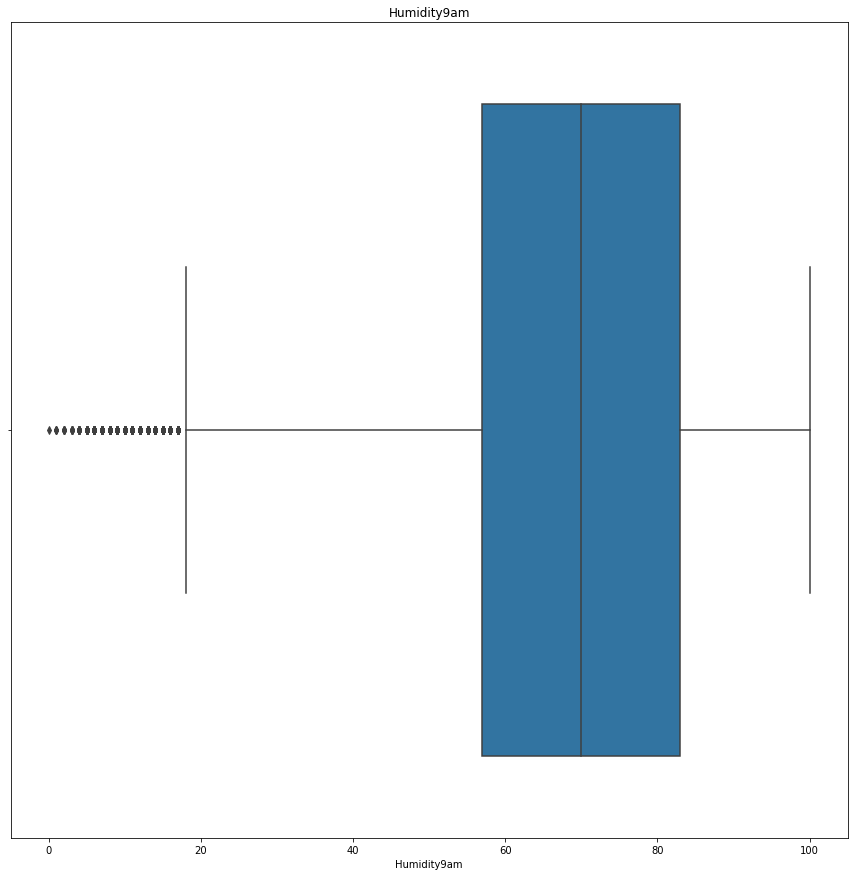

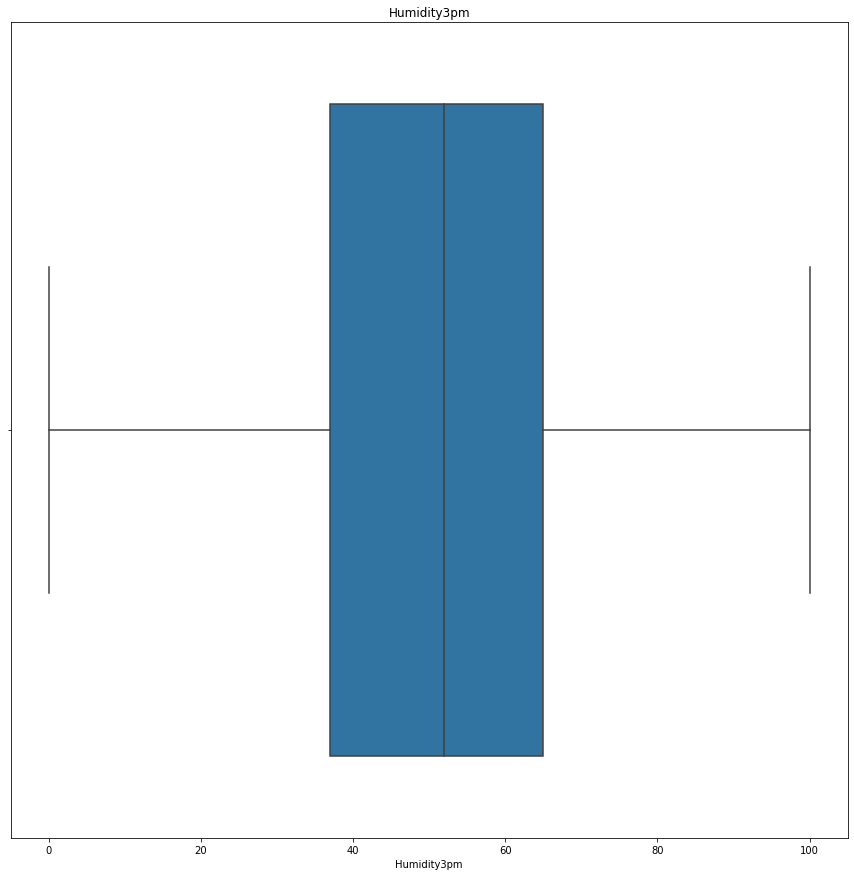

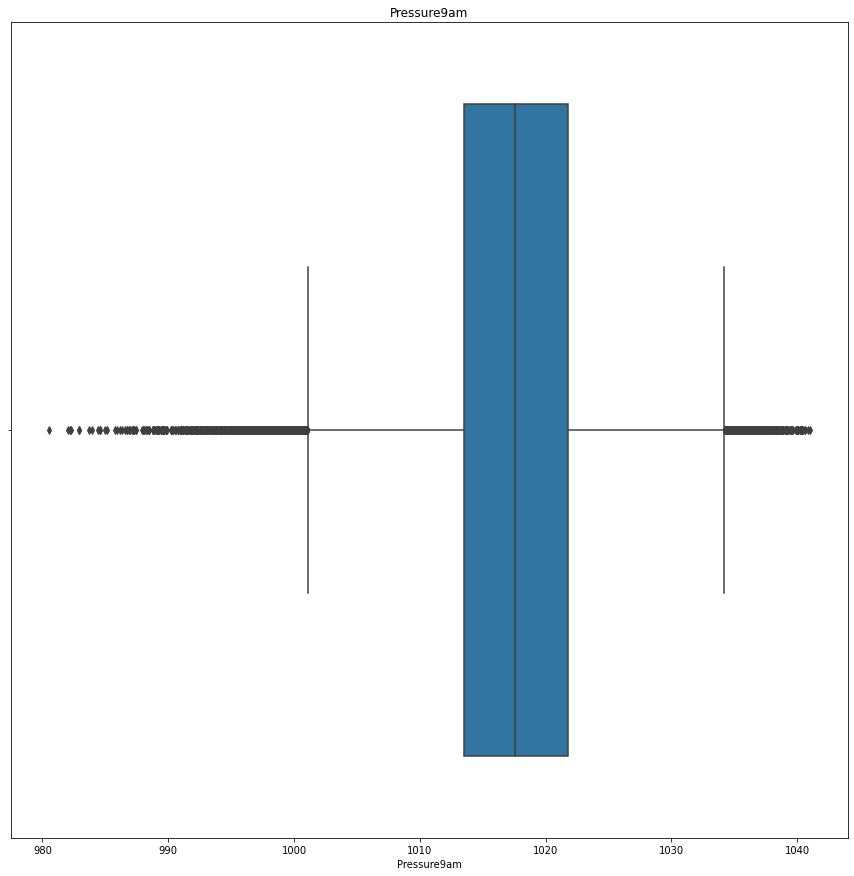

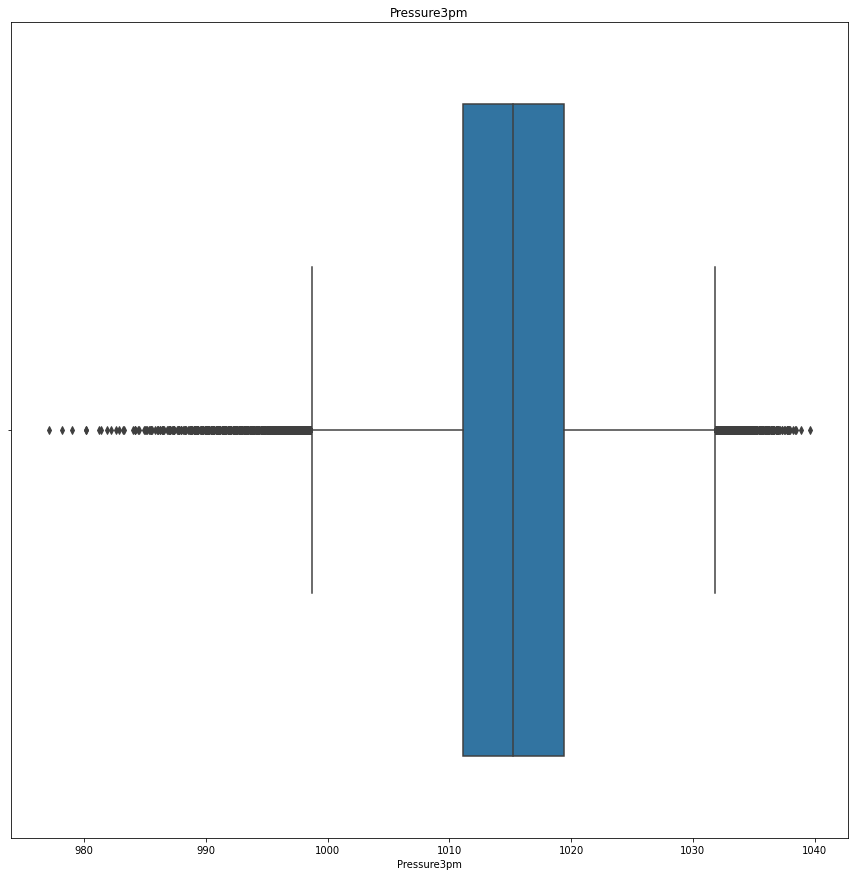

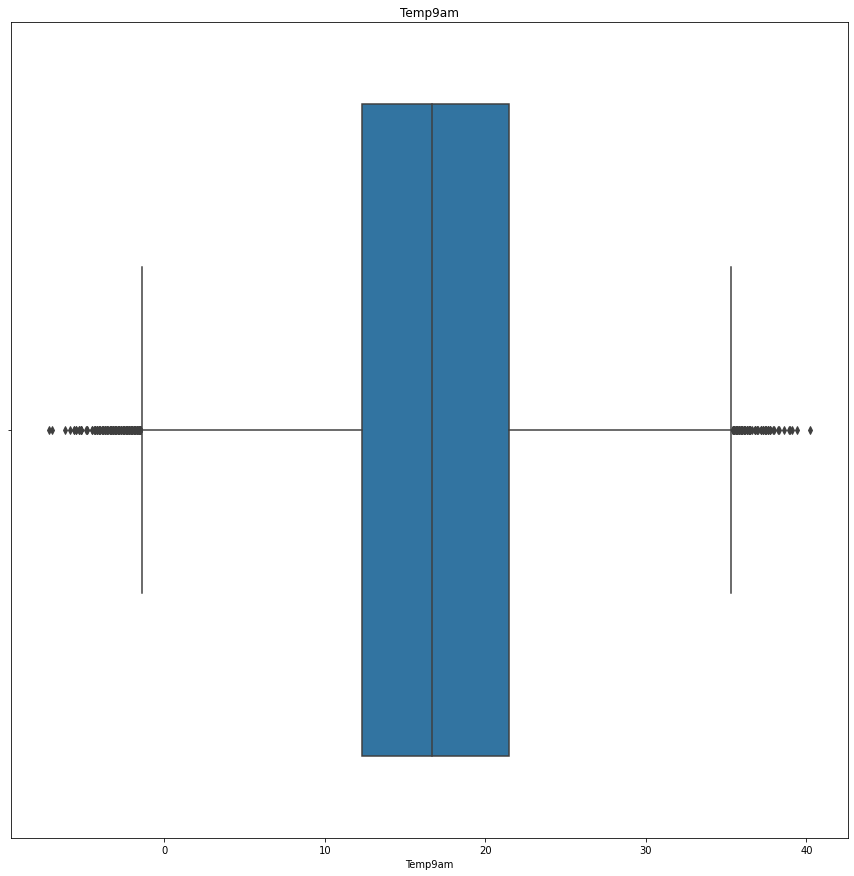

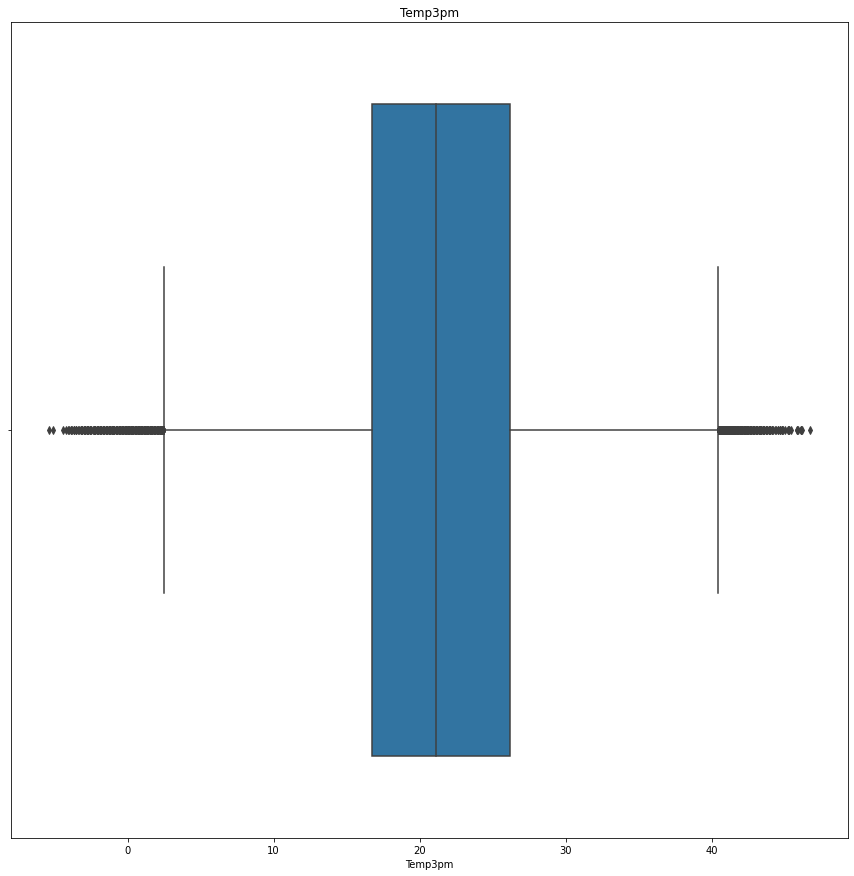

<Figure size 1080x1080 with 0 Axes>

In [35]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# Continuous Features 

In [36]:
for feature in continuous_feature:
    print(feature)

MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm


# Min Temparature Measurement

In [37]:
IQR=df.MinTemp.quantile(0.75)-df.MinTemp.quantile(0.25)
lower_bridge=df.MinTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MinTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-5.950000000000002 30.450000000000003


In [38]:
df.loc[df['MinTemp']>=30.45,'MinTemp']=30.45
df.loc[df['MinTemp']<=-5.95,'MinTemp']=-5.95

# Max Temp Measurement

In [39]:
IQR=df.MaxTemp.quantile(0.75)-df.MaxTemp.quantile(0.25)
lower_bridge=df.MaxTemp.quantile(0.25)-(IQR*1.5)
upper_bridge=df.MaxTemp.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.700000000000001 43.5


In [40]:
df.loc[df['MaxTemp']>=43.5,'MaxTemp']=43.5
df.loc[df['MaxTemp']<=2.7,'MaxTemp']=2.7

# RainFall Measurements

In [41]:
IQR=df.Rainfall.quantile(0.75)-df.Rainfall.quantile(0.25)
lower_bridge=df.Rainfall.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Rainfall.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-0.8999999999999999 1.5


In [42]:
df.loc[df['Rainfall']>=1.5,'Rainfall']=1.5
df.loc[df['Rainfall']<=-0.89,'Rainfall']=-0.89

# Evaporation measurements 

In [43]:
IQR=df.Evaporation.quantile(0.75)-df.Evaporation.quantile(0.25)
lower_bridge=df.Evaporation.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Evaporation.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-4.600000000000001 14.600000000000001


In [44]:
df.loc[df['Evaporation']>=14.6,'Evaporation']=14.6
df.loc[df['Evaporation']<=-4.6,'Evaporation']=-4.6

# WindGustSpeed Measurement

In [45]:
IQR=df.WindGustSpeed.quantile(0.75)-df.WindGustSpeed.quantile(0.25)
lower_bridge=df.WindGustSpeed.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindGustSpeed.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

8.5 68.5


In [46]:
df.loc[df['WindGustSpeed']>=68.5,'WindGustSpeed']=68.5
df.loc[df['WindGustSpeed']<=8.5,'WindGustSpeed']=8.5

# Measurement Of Wind Speed at 9:00 am

In [47]:
IQR=df.WindSpeed9am.quantile(0.75)-df.WindSpeed9am.quantile(0.25)
lower_bridge=df.WindSpeed9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-11.0 37.0


In [48]:
df.loc[df['WindSpeed9am']>=37,'WindSpeed9am']=37
df.loc[df['WindSpeed9am']<=-11,'WindSpeed9am']=-11

# Measurement Of Wind Speed at 3:00 pm

In [49]:
IQR=df.WindSpeed3pm.quantile(0.75)-df.WindSpeed3pm.quantile(0.25)
lower_bridge=df.WindSpeed3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.WindSpeed3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-3.5 40.5


In [50]:
df.loc[df['WindSpeed3pm']>40.5,'WindSpeed3pm']=40.5
df.loc[df['WindSpeed3pm']<=-3.5,'WindSpeed3pm']=-3.5

# Measurement Of Humidity at 9am

In [51]:
IQR=df.Humidity9am.quantile(0.75)-df.Humidity9am.quantile(0.25)
lower_bridge=df.Humidity9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Humidity9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

18.0 122.0


In [52]:
df.loc[df['Humidity9am']>=122,'Humidity9am']=122
df.loc[df['Humidity9am']<=18,'Humidity9am']=18

# Measurement Of Pressure at 9 am

In [53]:
IQR=df.Pressure9am.quantile(0.75)-df.Pressure9am.quantile(0.25)
lower_bridge=df.Pressure9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1001.0500000000001 1034.25


In [54]:
df.loc[df['Pressure9am']>=1034.25,'Pressure9am']=1034.25
df.loc[df['Pressure9am']<=1001.05,'Pressure9am']=1001.05

# Measurement Of Pressure at 3 pm

In [55]:
IQR=df.Pressure3pm.quantile(0.75)-df.Pressure3pm.quantile(0.25)
lower_bridge=df.Pressure3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Pressure3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

998.6500000000001 1031.85


In [56]:
df.loc[df['Pressure3pm']>=1031.85,'Pressure3pm']=1031.85
df.loc[df['Pressure3pm']<=998.65,'Pressure3pm']=998.65

# Measurement Of  Temp At 9 am

In [57]:
IQR=df.Temp9am.quantile(0.75)-df.Temp9am.quantile(0.25)
lower_bridge=df.Temp9am.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp9am.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

-1.4999999999999982 35.3


In [58]:
df.loc[df['Temp9am']>=35.3,'Temp9am']=35.3
df.loc[df['Temp9am']<=-1.49,'Temp9am']=-1.49

# Measurement Of Temp At 3 pm

In [59]:
IQR=df.Temp3pm.quantile(0.75)-df.Temp3pm.quantile(0.25)
lower_bridge=df.Temp3pm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Temp3pm.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

2.4499999999999993 40.45


In [60]:
df.loc[df['Temp3pm']>=40.45,'Temp3pm']=40.45
df.loc[df['Temp3pm']<=2.45,'Temp3pm']=2.45

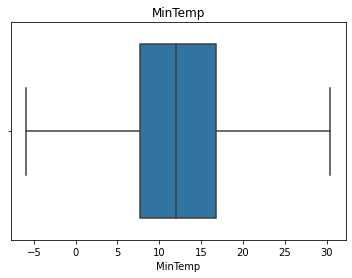

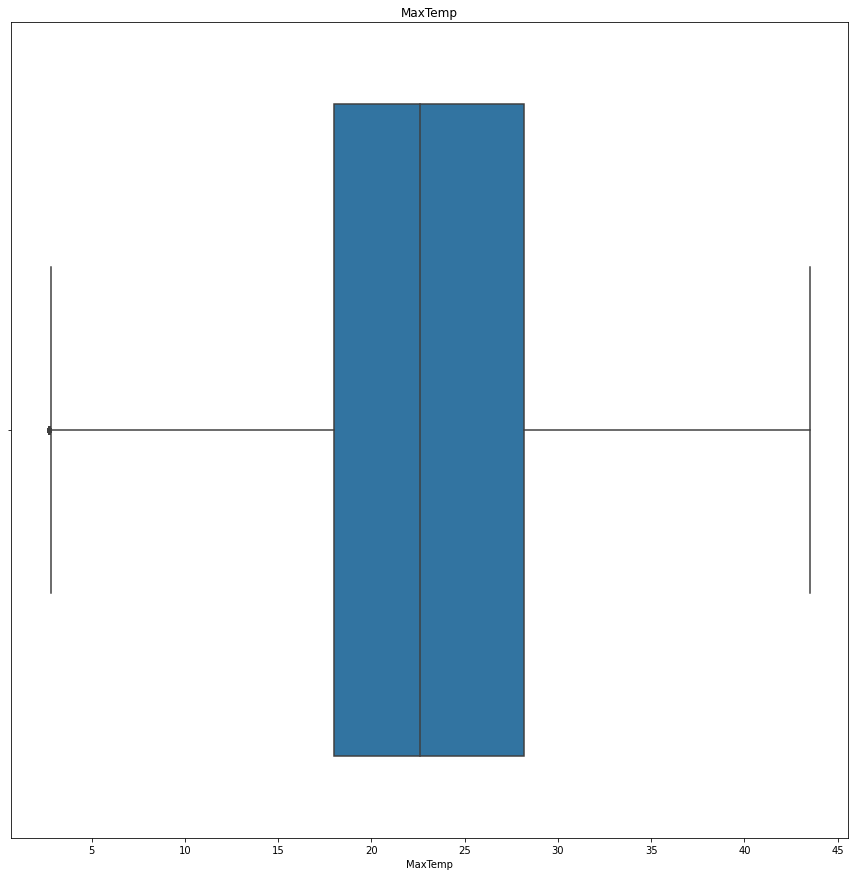

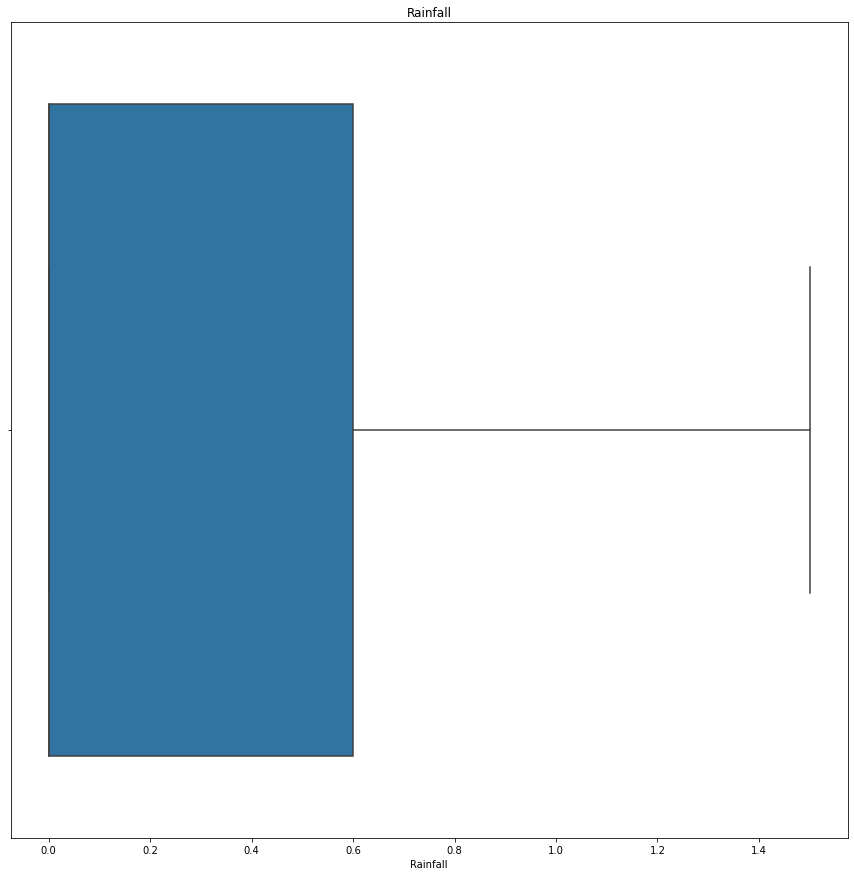

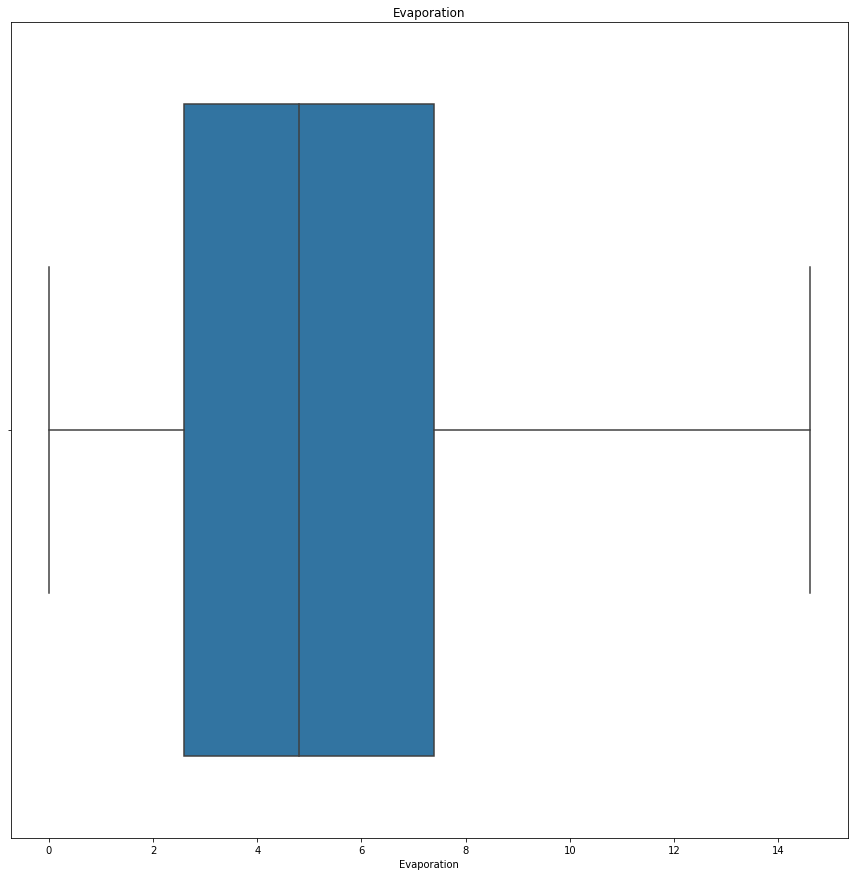

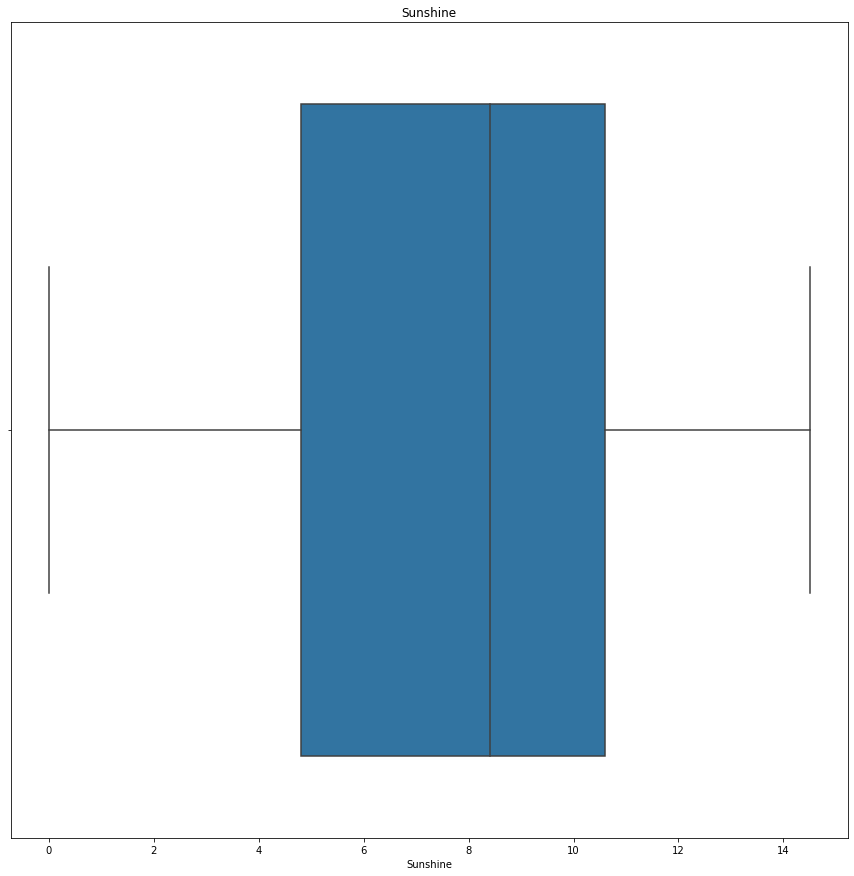

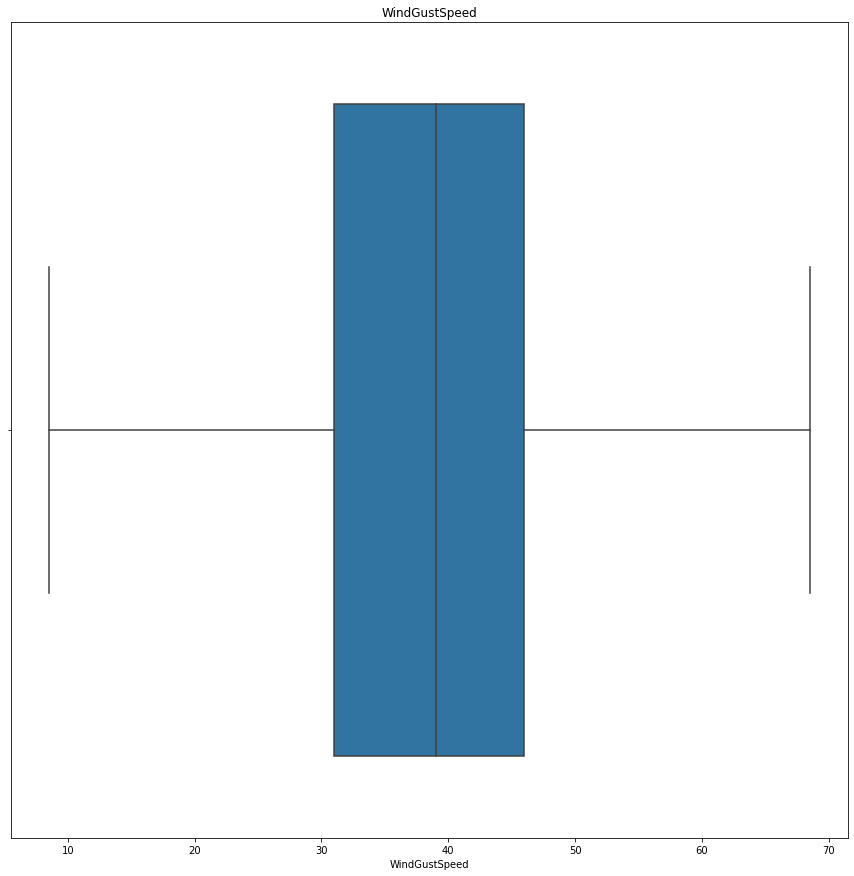

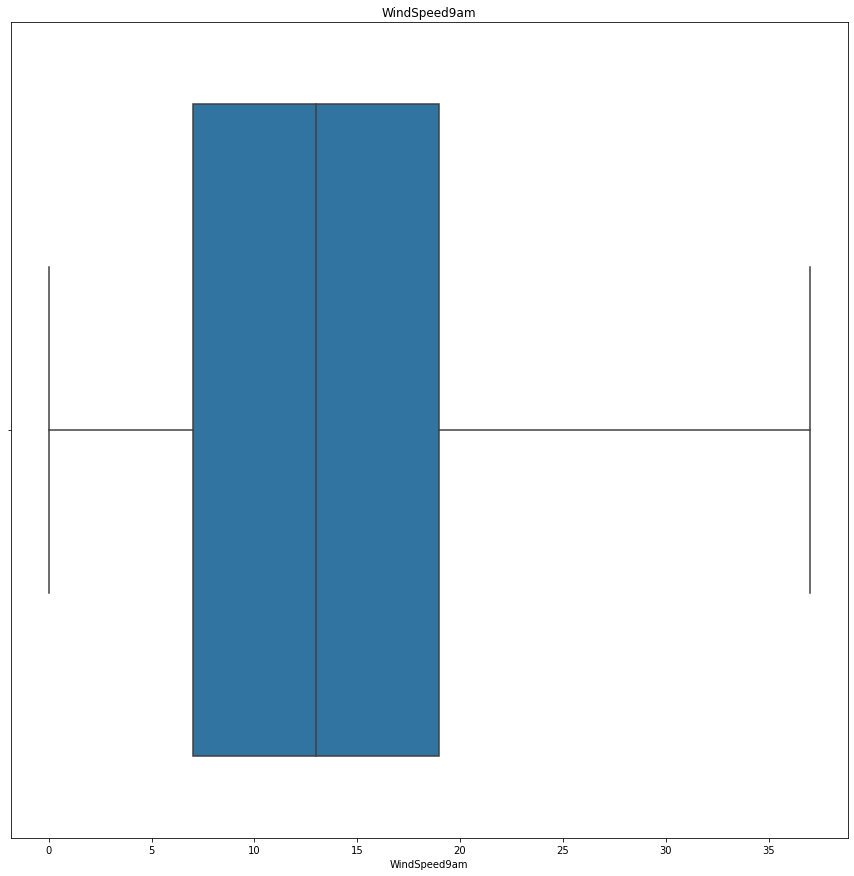

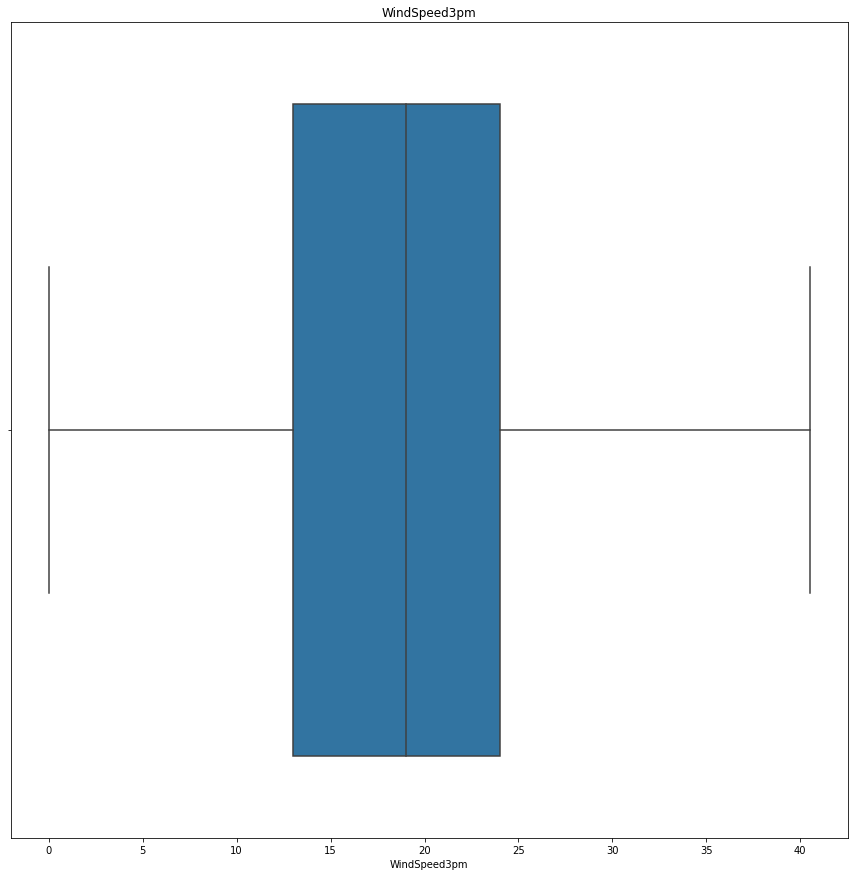

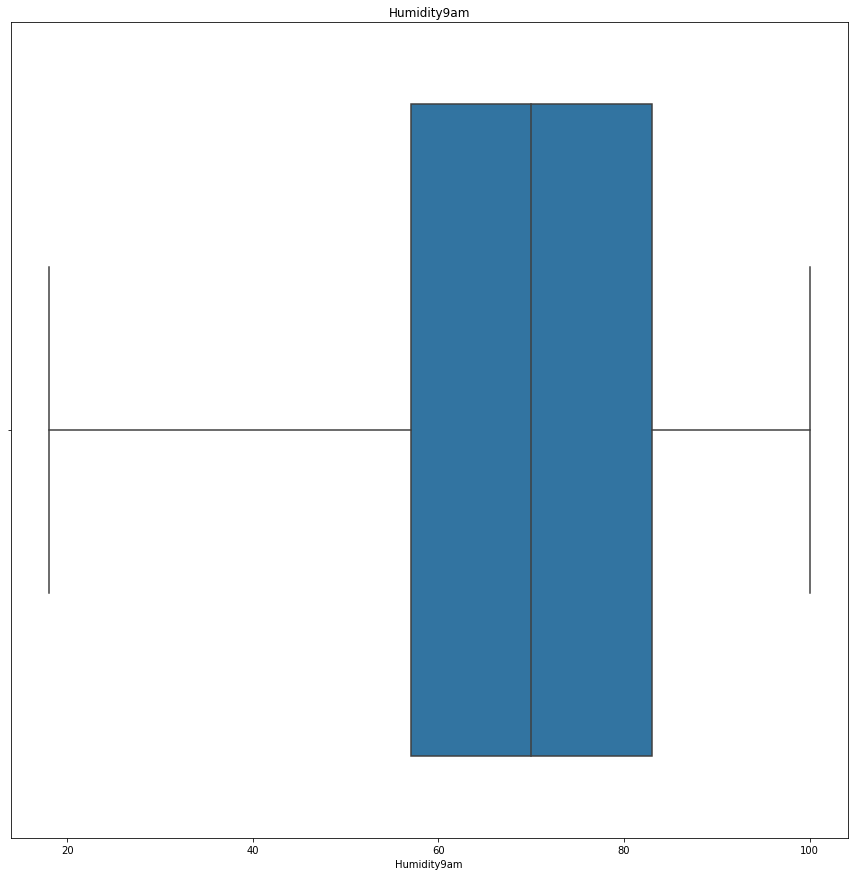

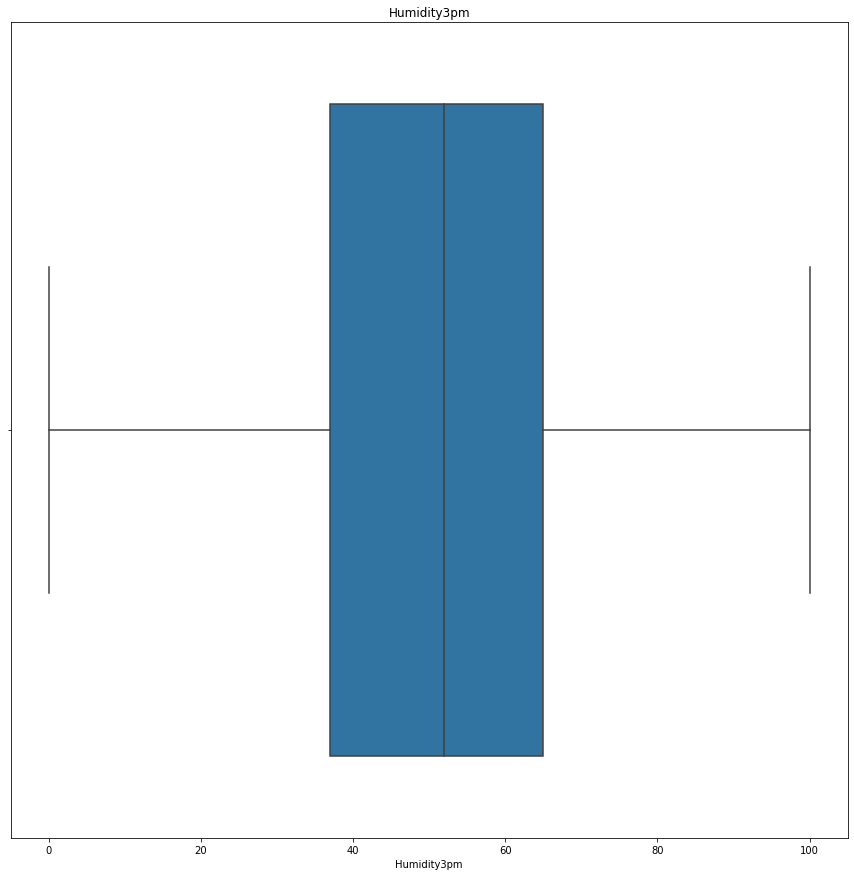

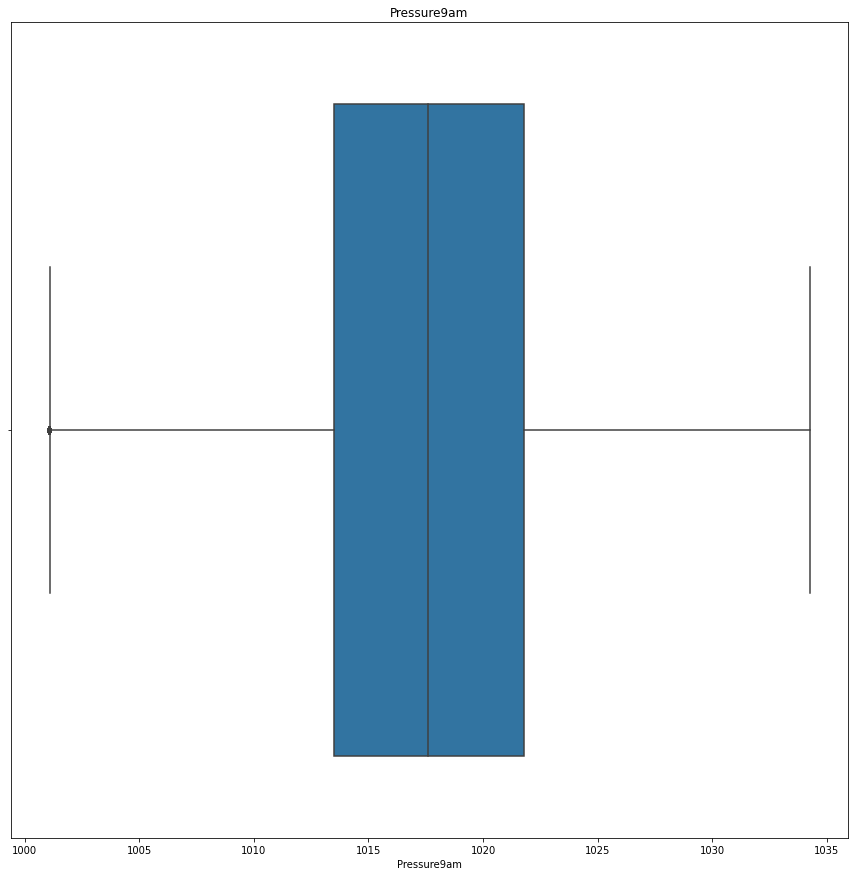

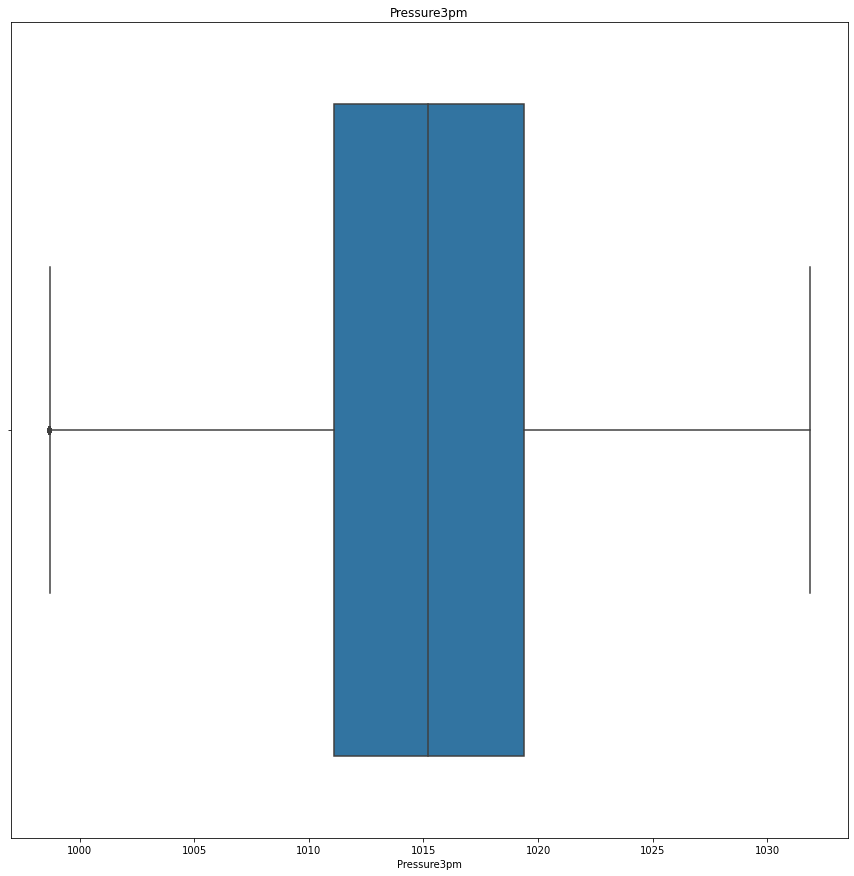

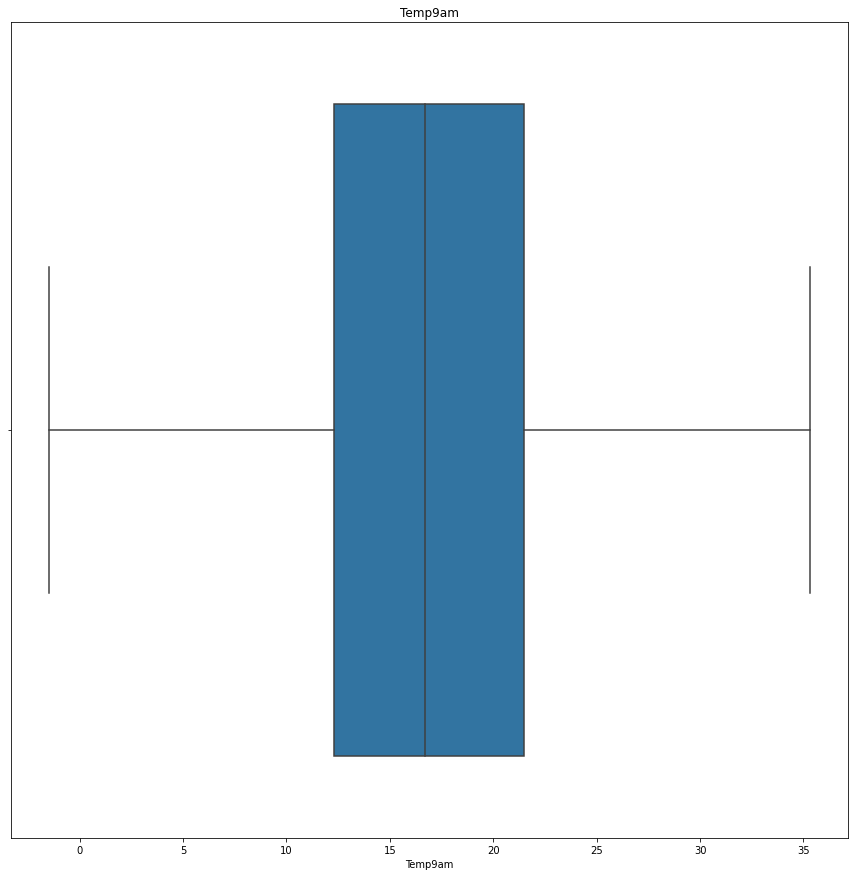

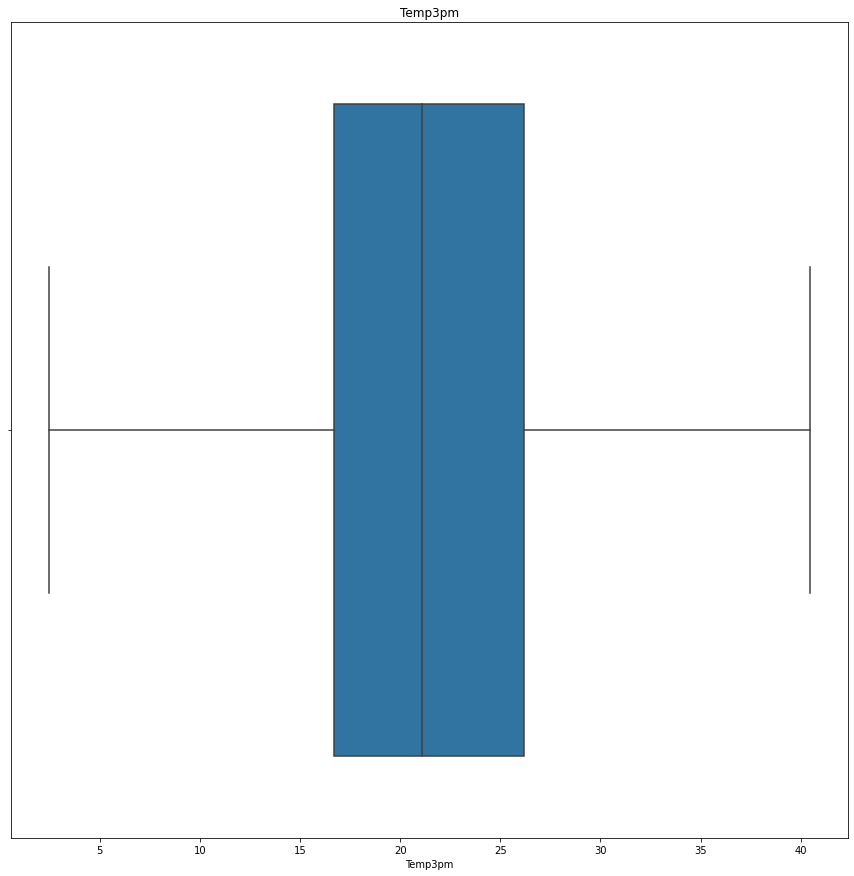

<Figure size 1080x1080 with 0 Axes>

In [61]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [62]:
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


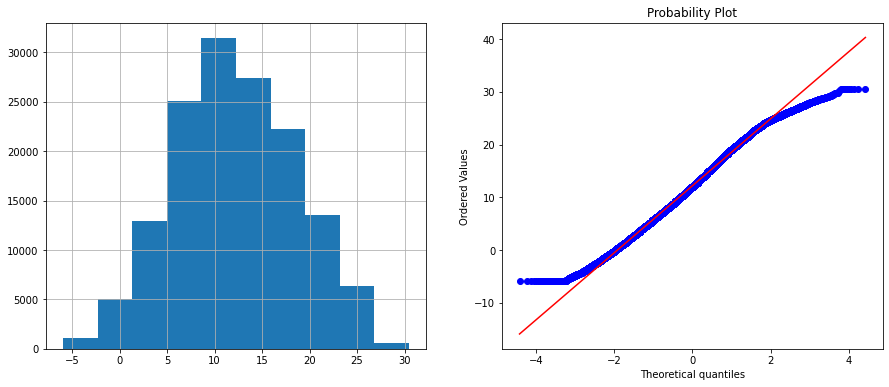

MaxTemp


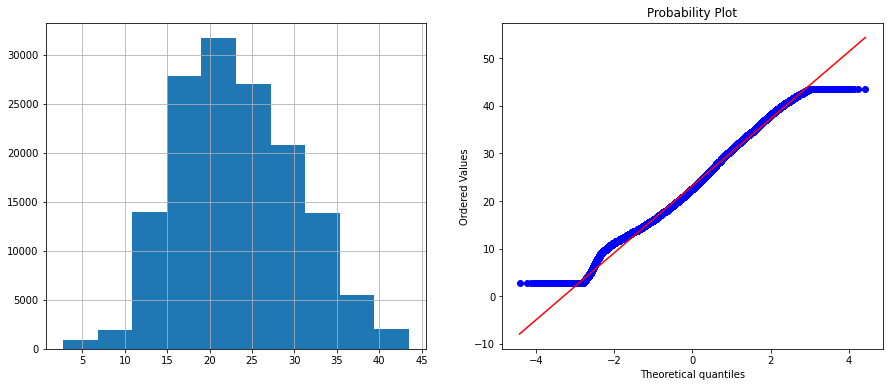

Rainfall


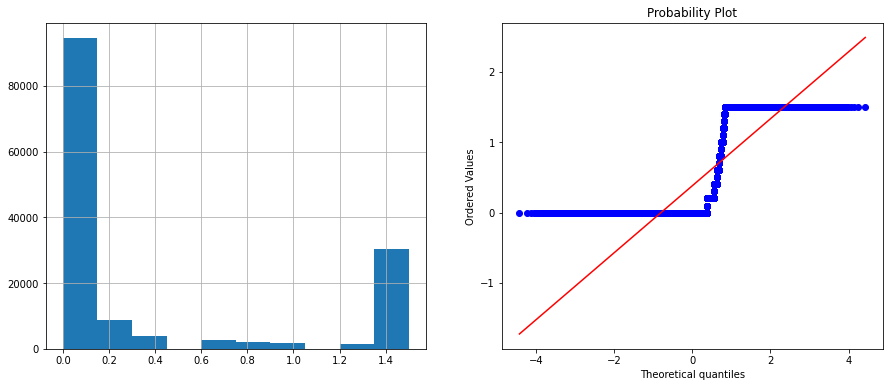

Evaporation


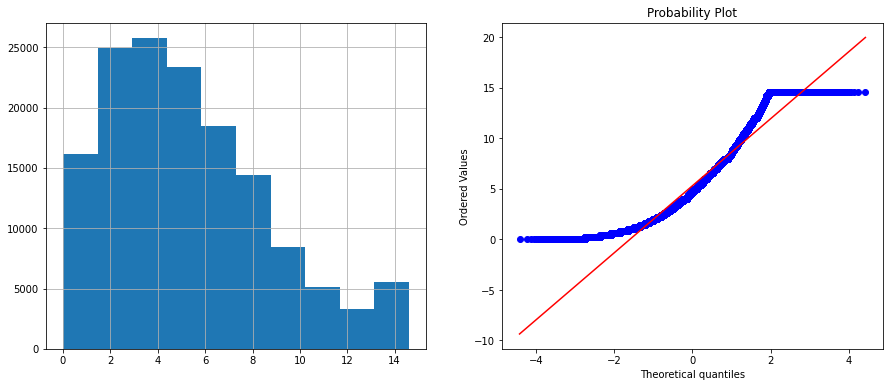

Sunshine


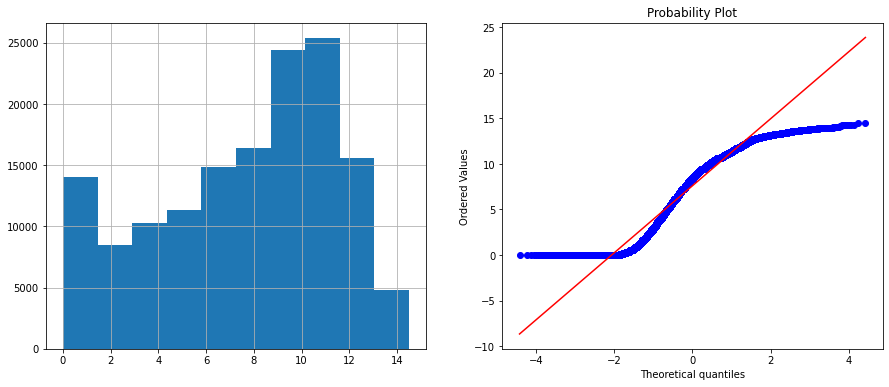

WindGustSpeed


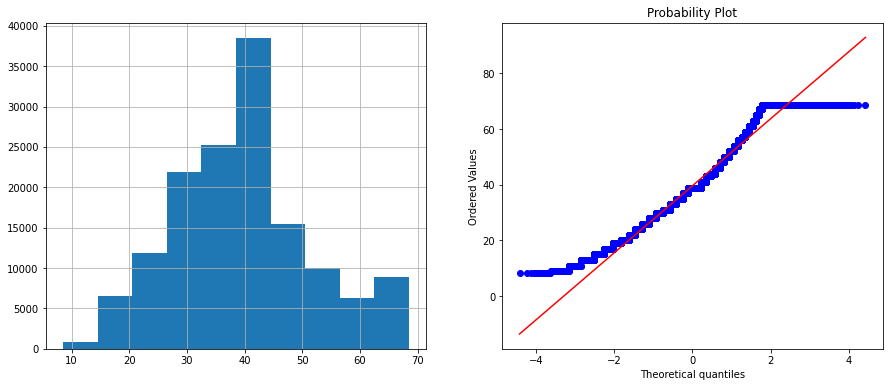

WindSpeed9am


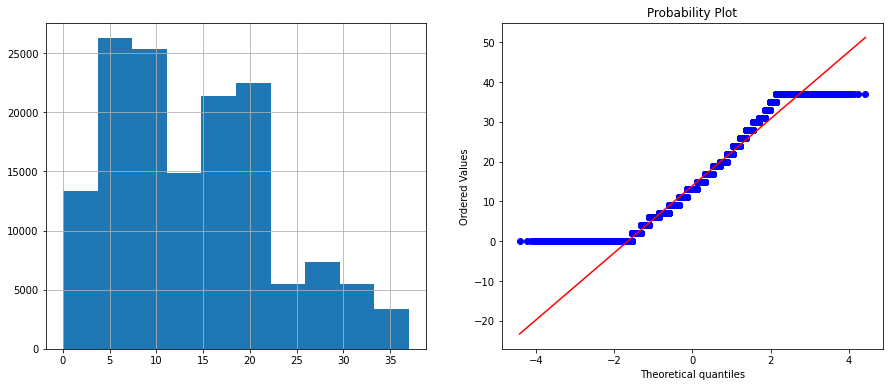

WindSpeed3pm


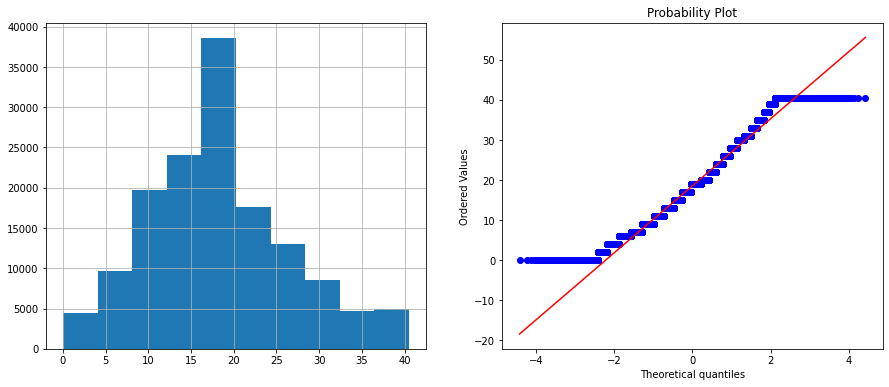

Humidity9am


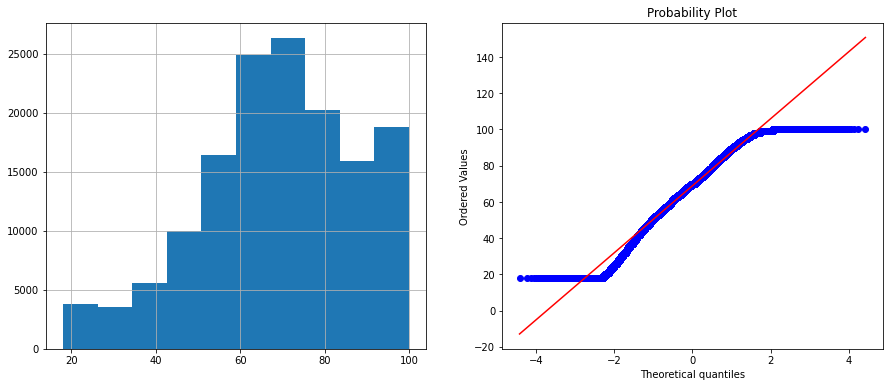

Humidity3pm


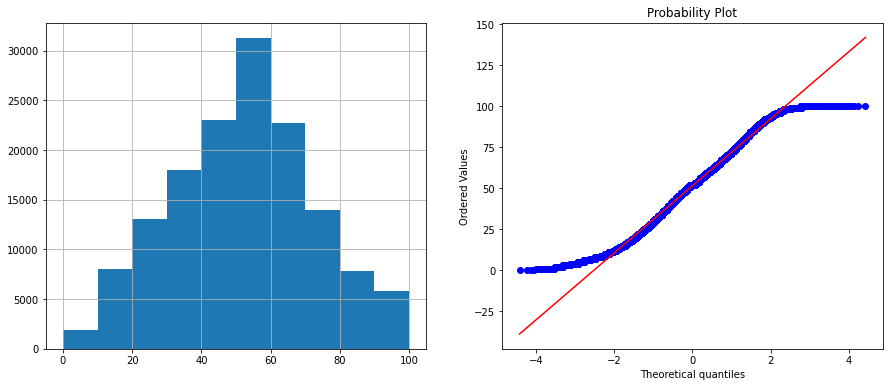

Pressure9am


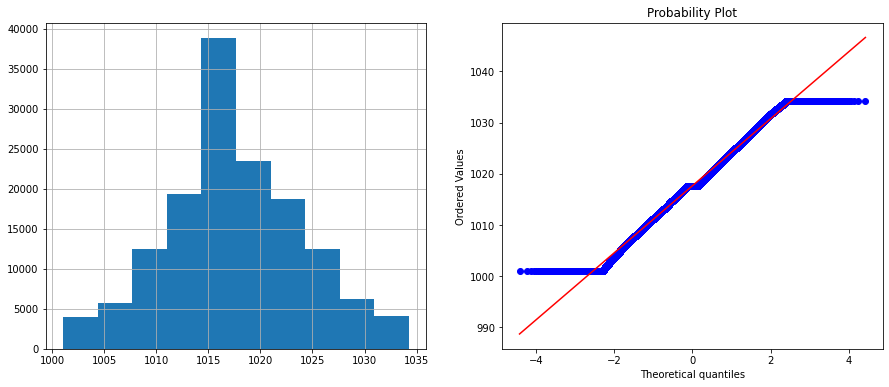

Pressure3pm


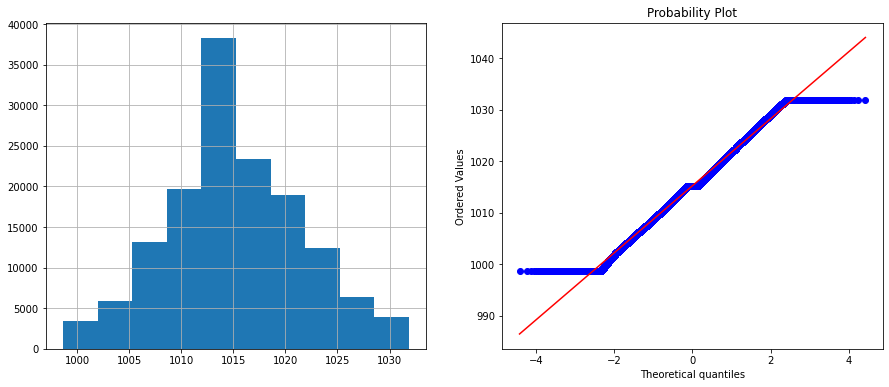

Temp9am


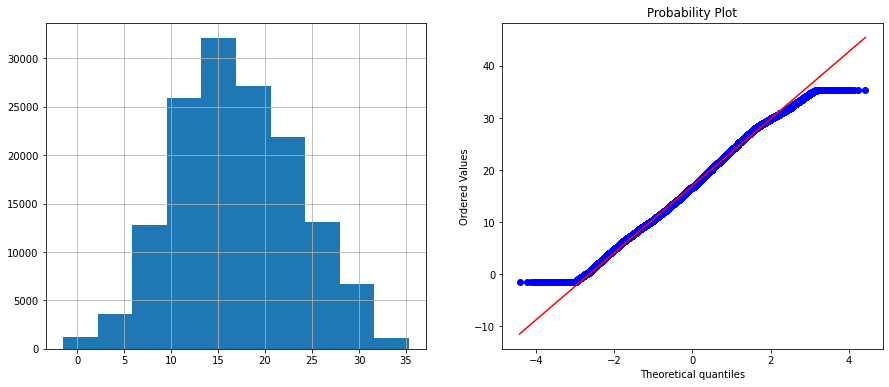

Temp3pm


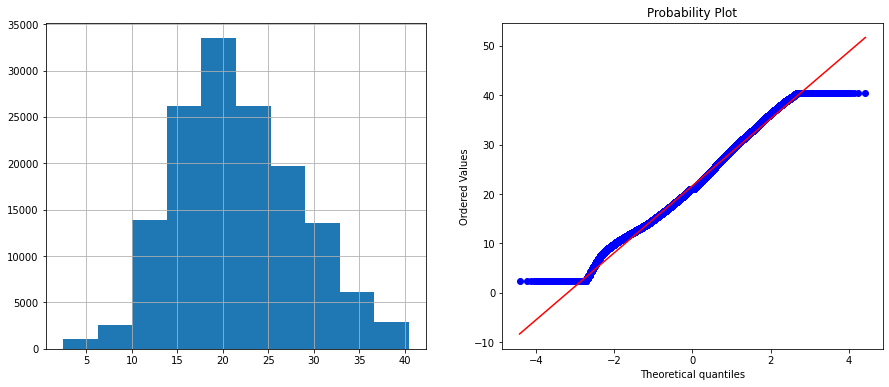

In [63]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [64]:
df.to_csv("preprocessed_1.csv", index=False)

In [65]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [67]:
y_train

43447     0
140904    0
54615     0
109793    0
74462     0
         ..
106567    0
52791     1
56339     0
82299     1
115175    0
Name: RainTomorrow, Length: 116368, dtype: uint8

In [68]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


In [69]:
cat = CatBoostClassifier(iterations=2500, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.041002
0:	total: 108ms	remaining: 4m 30s
1:	total: 145ms	remaining: 3m 1s
2:	total: 191ms	remaining: 2m 38s
3:	total: 230ms	remaining: 2m 23s
4:	total: 264ms	remaining: 2m 11s
5:	total: 299ms	remaining: 2m 4s
6:	total: 336ms	remaining: 1m 59s
7:	total: 371ms	remaining: 1m 55s
8:	total: 409ms	remaining: 1m 53s
9:	total: 451ms	remaining: 1m 52s
10:	total: 487ms	remaining: 1m 50s
11:	total: 521ms	remaining: 1m 48s
12:	total: 554ms	remaining: 1m 46s
13:	total: 592ms	remaining: 1m 45s
14:	total: 640ms	remaining: 1m 46s
15:	total: 677ms	remaining: 1m 45s
16:	total: 712ms	remaining: 1m 43s
17:	total: 746ms	remaining: 1m 42s
18:	total: 781ms	remaining: 1m 41s
19:	total: 815ms	remaining: 1m 41s
20:	total: 855ms	remaining: 1m 40s
21:	total: 896ms	remaining: 1m 40s
22:	total: 929ms	remaining: 1m 40s
23:	total: 964ms	remaining: 1m 39s
24:	total: 1000ms	remaining: 1m 38s
25:	total: 1.04s	remaining: 1m 38s
26:	total: 1.07s	remaining: 1m 38s
27:	total: 1.12s	remaining: 1m 38s
2

232:	total: 8.42s	remaining: 1m 21s
233:	total: 8.46s	remaining: 1m 21s
234:	total: 8.5s	remaining: 1m 21s
235:	total: 8.53s	remaining: 1m 21s
236:	total: 8.57s	remaining: 1m 21s
237:	total: 8.6s	remaining: 1m 21s
238:	total: 8.63s	remaining: 1m 21s
239:	total: 8.66s	remaining: 1m 21s
240:	total: 8.7s	remaining: 1m 21s
241:	total: 8.73s	remaining: 1m 21s
242:	total: 8.76s	remaining: 1m 21s
243:	total: 8.8s	remaining: 1m 21s
244:	total: 8.83s	remaining: 1m 21s
245:	total: 8.87s	remaining: 1m 21s
246:	total: 8.9s	remaining: 1m 21s
247:	total: 8.93s	remaining: 1m 21s
248:	total: 8.97s	remaining: 1m 21s
249:	total: 9s	remaining: 1m 21s
250:	total: 9.04s	remaining: 1m 21s
251:	total: 9.08s	remaining: 1m 20s
252:	total: 9.12s	remaining: 1m 20s
253:	total: 9.15s	remaining: 1m 20s
254:	total: 9.19s	remaining: 1m 20s
255:	total: 9.22s	remaining: 1m 20s
256:	total: 9.26s	remaining: 1m 20s
257:	total: 9.3s	remaining: 1m 20s
258:	total: 9.33s	remaining: 1m 20s
259:	total: 9.37s	remaining: 1m 20s
2

467:	total: 16.6s	remaining: 1m 12s
468:	total: 16.6s	remaining: 1m 11s
469:	total: 16.7s	remaining: 1m 11s
470:	total: 16.7s	remaining: 1m 11s
471:	total: 16.7s	remaining: 1m 11s
472:	total: 16.8s	remaining: 1m 11s
473:	total: 16.8s	remaining: 1m 11s
474:	total: 16.8s	remaining: 1m 11s
475:	total: 16.9s	remaining: 1m 11s
476:	total: 16.9s	remaining: 1m 11s
477:	total: 16.9s	remaining: 1m 11s
478:	total: 17s	remaining: 1m 11s
479:	total: 17s	remaining: 1m 11s
480:	total: 17s	remaining: 1m 11s
481:	total: 17.1s	remaining: 1m 11s
482:	total: 17.1s	remaining: 1m 11s
483:	total: 17.1s	remaining: 1m 11s
484:	total: 17.2s	remaining: 1m 11s
485:	total: 17.2s	remaining: 1m 11s
486:	total: 17.2s	remaining: 1m 11s
487:	total: 17.3s	remaining: 1m 11s
488:	total: 17.3s	remaining: 1m 11s
489:	total: 17.3s	remaining: 1m 11s
490:	total: 17.4s	remaining: 1m 11s
491:	total: 17.4s	remaining: 1m 11s
492:	total: 17.4s	remaining: 1m 11s
493:	total: 17.5s	remaining: 1m 10s
494:	total: 17.5s	remaining: 1m 10

703:	total: 24.7s	remaining: 1m 3s
704:	total: 24.7s	remaining: 1m 2s
705:	total: 24.8s	remaining: 1m 2s
706:	total: 24.8s	remaining: 1m 2s
707:	total: 24.8s	remaining: 1m 2s
708:	total: 24.9s	remaining: 1m 2s
709:	total: 24.9s	remaining: 1m 2s
710:	total: 24.9s	remaining: 1m 2s
711:	total: 25s	remaining: 1m 2s
712:	total: 25s	remaining: 1m 2s
713:	total: 25s	remaining: 1m 2s
714:	total: 25.1s	remaining: 1m 2s
715:	total: 25.1s	remaining: 1m 2s
716:	total: 25.1s	remaining: 1m 2s
717:	total: 25.2s	remaining: 1m 2s
718:	total: 25.2s	remaining: 1m 2s
719:	total: 25.2s	remaining: 1m 2s
720:	total: 25.3s	remaining: 1m 2s
721:	total: 25.3s	remaining: 1m 2s
722:	total: 25.4s	remaining: 1m 2s
723:	total: 25.4s	remaining: 1m 2s
724:	total: 25.4s	remaining: 1m 2s
725:	total: 25.4s	remaining: 1m 2s
726:	total: 25.5s	remaining: 1m 2s
727:	total: 25.5s	remaining: 1m 2s
728:	total: 25.5s	remaining: 1m 2s
729:	total: 25.6s	remaining: 1m 2s
730:	total: 25.6s	remaining: 1m 1s
731:	total: 25.6s	remainin

942:	total: 32.9s	remaining: 54.3s
943:	total: 32.9s	remaining: 54.2s
944:	total: 32.9s	remaining: 54.2s
945:	total: 33s	remaining: 54.2s
946:	total: 33s	remaining: 54.1s
947:	total: 33s	remaining: 54.1s
948:	total: 33.1s	remaining: 54.1s
949:	total: 33.1s	remaining: 54s
950:	total: 33.1s	remaining: 54s
951:	total: 33.2s	remaining: 53.9s
952:	total: 33.2s	remaining: 53.9s
953:	total: 33.2s	remaining: 53.9s
954:	total: 33.3s	remaining: 53.8s
955:	total: 33.3s	remaining: 53.8s
956:	total: 33.3s	remaining: 53.8s
957:	total: 33.4s	remaining: 53.7s
958:	total: 33.4s	remaining: 53.7s
959:	total: 33.4s	remaining: 53.6s
960:	total: 33.5s	remaining: 53.6s
961:	total: 33.5s	remaining: 53.6s
962:	total: 33.5s	remaining: 53.5s
963:	total: 33.6s	remaining: 53.5s
964:	total: 33.6s	remaining: 53.5s
965:	total: 33.6s	remaining: 53.4s
966:	total: 33.7s	remaining: 53.4s
967:	total: 33.7s	remaining: 53.3s
968:	total: 33.7s	remaining: 53.3s
969:	total: 33.8s	remaining: 53.3s
970:	total: 33.8s	remaining: 5

1175:	total: 40.8s	remaining: 45.9s
1176:	total: 40.8s	remaining: 45.9s
1177:	total: 40.8s	remaining: 45.8s
1178:	total: 40.9s	remaining: 45.8s
1179:	total: 40.9s	remaining: 45.8s
1180:	total: 40.9s	remaining: 45.7s
1181:	total: 41s	remaining: 45.7s
1182:	total: 41s	remaining: 45.7s
1183:	total: 41s	remaining: 45.6s
1184:	total: 41.1s	remaining: 45.6s
1185:	total: 41.1s	remaining: 45.5s
1186:	total: 41.1s	remaining: 45.5s
1187:	total: 41.2s	remaining: 45.5s
1188:	total: 41.2s	remaining: 45.4s
1189:	total: 41.2s	remaining: 45.4s
1190:	total: 41.3s	remaining: 45.4s
1191:	total: 41.3s	remaining: 45.3s
1192:	total: 41.3s	remaining: 45.3s
1193:	total: 41.4s	remaining: 45.3s
1194:	total: 41.4s	remaining: 45.2s
1195:	total: 41.5s	remaining: 45.2s
1196:	total: 41.5s	remaining: 45.2s
1197:	total: 41.5s	remaining: 45.1s
1198:	total: 41.5s	remaining: 45.1s
1199:	total: 41.6s	remaining: 45s
1200:	total: 41.6s	remaining: 45s
1201:	total: 41.6s	remaining: 45s
1202:	total: 41.7s	remaining: 44.9s
1203

1406:	total: 48.5s	remaining: 37.7s
1407:	total: 48.6s	remaining: 37.7s
1408:	total: 48.6s	remaining: 37.6s
1409:	total: 48.6s	remaining: 37.6s
1410:	total: 48.6s	remaining: 37.5s
1411:	total: 48.7s	remaining: 37.5s
1412:	total: 48.7s	remaining: 37.5s
1413:	total: 48.8s	remaining: 37.4s
1414:	total: 48.8s	remaining: 37.4s
1415:	total: 48.8s	remaining: 37.4s
1416:	total: 48.9s	remaining: 37.3s
1417:	total: 48.9s	remaining: 37.3s
1418:	total: 48.9s	remaining: 37.3s
1419:	total: 49s	remaining: 37.2s
1420:	total: 49s	remaining: 37.2s
1421:	total: 49s	remaining: 37.2s
1422:	total: 49.1s	remaining: 37.1s
1423:	total: 49.1s	remaining: 37.1s
1424:	total: 49.1s	remaining: 37.1s
1425:	total: 49.2s	remaining: 37s
1426:	total: 49.2s	remaining: 37s
1427:	total: 49.2s	remaining: 37s
1428:	total: 49.3s	remaining: 36.9s
1429:	total: 49.3s	remaining: 36.9s
1430:	total: 49.3s	remaining: 36.8s
1431:	total: 49.4s	remaining: 36.8s
1432:	total: 49.4s	remaining: 36.8s
1433:	total: 49.4s	remaining: 36.7s
1434

1639:	total: 56.4s	remaining: 29.6s
1640:	total: 56.4s	remaining: 29.5s
1641:	total: 56.4s	remaining: 29.5s
1642:	total: 56.5s	remaining: 29.5s
1643:	total: 56.5s	remaining: 29.4s
1644:	total: 56.5s	remaining: 29.4s
1645:	total: 56.6s	remaining: 29.3s
1646:	total: 56.6s	remaining: 29.3s
1647:	total: 56.6s	remaining: 29.3s
1648:	total: 56.7s	remaining: 29.2s
1649:	total: 56.7s	remaining: 29.2s
1650:	total: 56.7s	remaining: 29.2s
1651:	total: 56.8s	remaining: 29.1s
1652:	total: 56.8s	remaining: 29.1s
1653:	total: 56.8s	remaining: 29.1s
1654:	total: 56.9s	remaining: 29s
1655:	total: 56.9s	remaining: 29s
1656:	total: 56.9s	remaining: 29s
1657:	total: 57s	remaining: 28.9s
1658:	total: 57s	remaining: 28.9s
1659:	total: 57s	remaining: 28.9s
1660:	total: 57.1s	remaining: 28.8s
1661:	total: 57.1s	remaining: 28.8s
1662:	total: 57.1s	remaining: 28.8s
1663:	total: 57.2s	remaining: 28.7s
1664:	total: 57.2s	remaining: 28.7s
1665:	total: 57.2s	remaining: 28.7s
1666:	total: 57.3s	remaining: 28.6s
1667

1871:	total: 1m 4s	remaining: 21.6s
1872:	total: 1m 4s	remaining: 21.6s
1873:	total: 1m 4s	remaining: 21.5s
1874:	total: 1m 4s	remaining: 21.5s
1875:	total: 1m 4s	remaining: 21.5s
1876:	total: 1m 4s	remaining: 21.4s
1877:	total: 1m 4s	remaining: 21.4s
1878:	total: 1m 4s	remaining: 21.4s
1879:	total: 1m 4s	remaining: 21.3s
1880:	total: 1m 4s	remaining: 21.3s
1881:	total: 1m 4s	remaining: 21.3s
1882:	total: 1m 4s	remaining: 21.2s
1883:	total: 1m 4s	remaining: 21.2s
1884:	total: 1m 4s	remaining: 21.2s
1885:	total: 1m 4s	remaining: 21.1s
1886:	total: 1m 4s	remaining: 21.1s
1887:	total: 1m 4s	remaining: 21.1s
1888:	total: 1m 4s	remaining: 21s
1889:	total: 1m 5s	remaining: 21s
1890:	total: 1m 5s	remaining: 20.9s
1891:	total: 1m 5s	remaining: 20.9s
1892:	total: 1m 5s	remaining: 20.9s
1893:	total: 1m 5s	remaining: 20.8s
1894:	total: 1m 5s	remaining: 20.8s
1895:	total: 1m 5s	remaining: 20.8s
1896:	total: 1m 5s	remaining: 20.7s
1897:	total: 1m 5s	remaining: 20.7s
1898:	total: 1m 5s	remaining: 20

2099:	total: 1m 12s	remaining: 13.7s
2100:	total: 1m 12s	remaining: 13.7s
2101:	total: 1m 12s	remaining: 13.7s
2102:	total: 1m 12s	remaining: 13.6s
2103:	total: 1m 12s	remaining: 13.6s
2104:	total: 1m 12s	remaining: 13.6s
2105:	total: 1m 12s	remaining: 13.5s
2106:	total: 1m 12s	remaining: 13.5s
2107:	total: 1m 12s	remaining: 13.5s
2108:	total: 1m 12s	remaining: 13.4s
2109:	total: 1m 12s	remaining: 13.4s
2110:	total: 1m 12s	remaining: 13.3s
2111:	total: 1m 12s	remaining: 13.3s
2112:	total: 1m 12s	remaining: 13.3s
2113:	total: 1m 12s	remaining: 13.2s
2114:	total: 1m 12s	remaining: 13.2s
2115:	total: 1m 12s	remaining: 13.2s
2116:	total: 1m 12s	remaining: 13.1s
2117:	total: 1m 12s	remaining: 13.1s
2118:	total: 1m 12s	remaining: 13.1s
2119:	total: 1m 12s	remaining: 13s
2120:	total: 1m 12s	remaining: 13s
2121:	total: 1m 12s	remaining: 13s
2122:	total: 1m 12s	remaining: 12.9s
2123:	total: 1m 12s	remaining: 12.9s
2124:	total: 1m 12s	remaining: 12.9s
2125:	total: 1m 12s	remaining: 12.8s
2126:	t

2324:	total: 1m 19s	remaining: 5.99s
2325:	total: 1m 19s	remaining: 5.96s
2326:	total: 1m 19s	remaining: 5.92s
2327:	total: 1m 19s	remaining: 5.89s
2328:	total: 1m 19s	remaining: 5.86s
2329:	total: 1m 19s	remaining: 5.82s
2330:	total: 1m 19s	remaining: 5.79s
2331:	total: 1m 19s	remaining: 5.75s
2332:	total: 1m 19s	remaining: 5.72s
2333:	total: 1m 19s	remaining: 5.68s
2334:	total: 1m 19s	remaining: 5.65s
2335:	total: 1m 19s	remaining: 5.62s
2336:	total: 1m 20s	remaining: 5.58s
2337:	total: 1m 20s	remaining: 5.55s
2338:	total: 1m 20s	remaining: 5.51s
2339:	total: 1m 20s	remaining: 5.48s
2340:	total: 1m 20s	remaining: 5.44s
2341:	total: 1m 20s	remaining: 5.41s
2342:	total: 1m 20s	remaining: 5.38s
2343:	total: 1m 20s	remaining: 5.34s
2344:	total: 1m 20s	remaining: 5.31s
2345:	total: 1m 20s	remaining: 5.27s
2346:	total: 1m 20s	remaining: 5.24s
2347:	total: 1m 20s	remaining: 5.21s
2348:	total: 1m 20s	remaining: 5.17s
2349:	total: 1m 20s	remaining: 5.14s
2350:	total: 1m 20s	remaining: 5.1s
23

In [72]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[21496  1221]
 [ 2770  3605]]
0.8628145194555205
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22717
           1       0.75      0.57      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



In [73]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [74]:
y_pred1 =rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[20631  2086]
 [ 2470  3905]]
0.8433933727485219
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.65      0.61      0.63      6375

    accuracy                           0.84     29092
   macro avg       0.77      0.76      0.77     29092
weighted avg       0.84      0.84      0.84     29092



0.7603617572397626

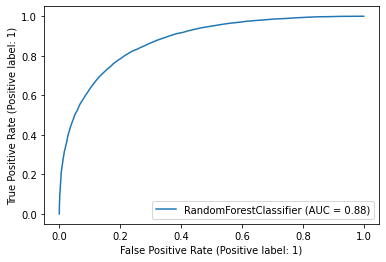

In [75]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None) 

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

LogisticRegression()

In [77]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17593  5124]
 [ 1519  4856]]
0.7716554379210779
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22717
           1       0.49      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



0.7680837690008433

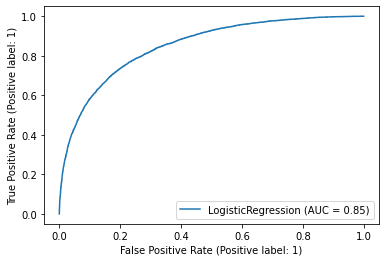

In [78]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None) 

In [79]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [80]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[17078  5639]
 [ 1661  4714]]
0.7490719098033823
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     22717
           1       0.46      0.74      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.75      0.69     29092
weighted avg       0.81      0.75      0.77     29092



0.7456113906230715

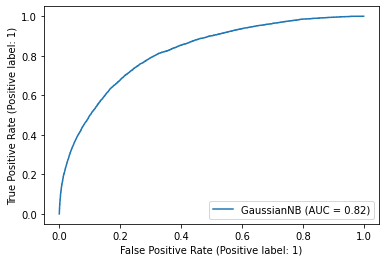

In [81]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None) 

In [82]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [83]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[17306  5411]
 [ 1771  4604]]
0.7531280076997112
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     22717
           1       0.46      0.72      0.56      6375

    accuracy                           0.75     29092
   macro avg       0.68      0.74      0.69     29092
weighted avg       0.81      0.75      0.77     29092



0.7420022078999315

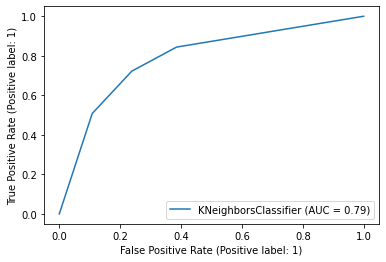

In [84]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None) 

In [85]:
import warnings
warnings.filterwarnings("ignore")

xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

[07:42:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [86]:
y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[21396  1321]
 [ 2844  3531]]
0.8568334937439847
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.73      0.55      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



0.7478660345064204

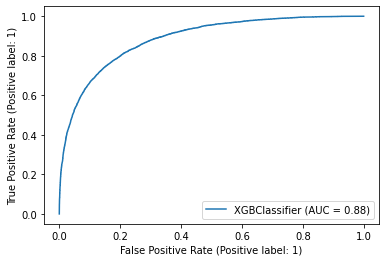

In [87]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None) 

In [94]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [91]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[17824  4893]
 [ 1594  4781]]
0.7770177368348687
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.49      0.75      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



0.7672857141624093

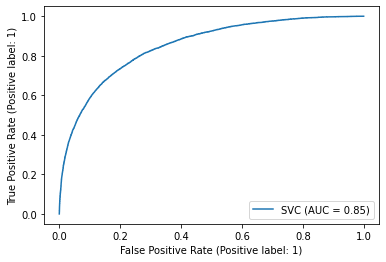

In [92]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None) 

In [88]:

# joblib.dump(cat, "cat.pkl")
# joblib.dump(logreg, "logreg.pkl")
# joblib.dump(gnb, "gnb.pkl")
# joblib.dump(knn, "knn.pkl")
#joblib.dump(svc, "svc.pkl")
joblib.dump(xgb, "xgb.pkl")

['xgb.pkl']

In [89]:
 joblib.dump(rf, "rf.pkl")

['rf.pkl']

In [90]:
joblib.dump(cat, "cat.pkl")

['cat.pkl']

In [91]:
joblib.dump(logreg, "logreg.pkl")

['logreg.pkl']

In [92]:
joblib.dump(gnb, "gnb.pkl")

['gnb.pkl']

In [93]:
joblib.dump(knn, "knn.pkl")

['knn.pkl']